# 10 - Sampling

## Ważne biblioteki

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import scipy.stats as ss
from matplotlib.patches import Circle
import matplotlib.patches as patches

In [3]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

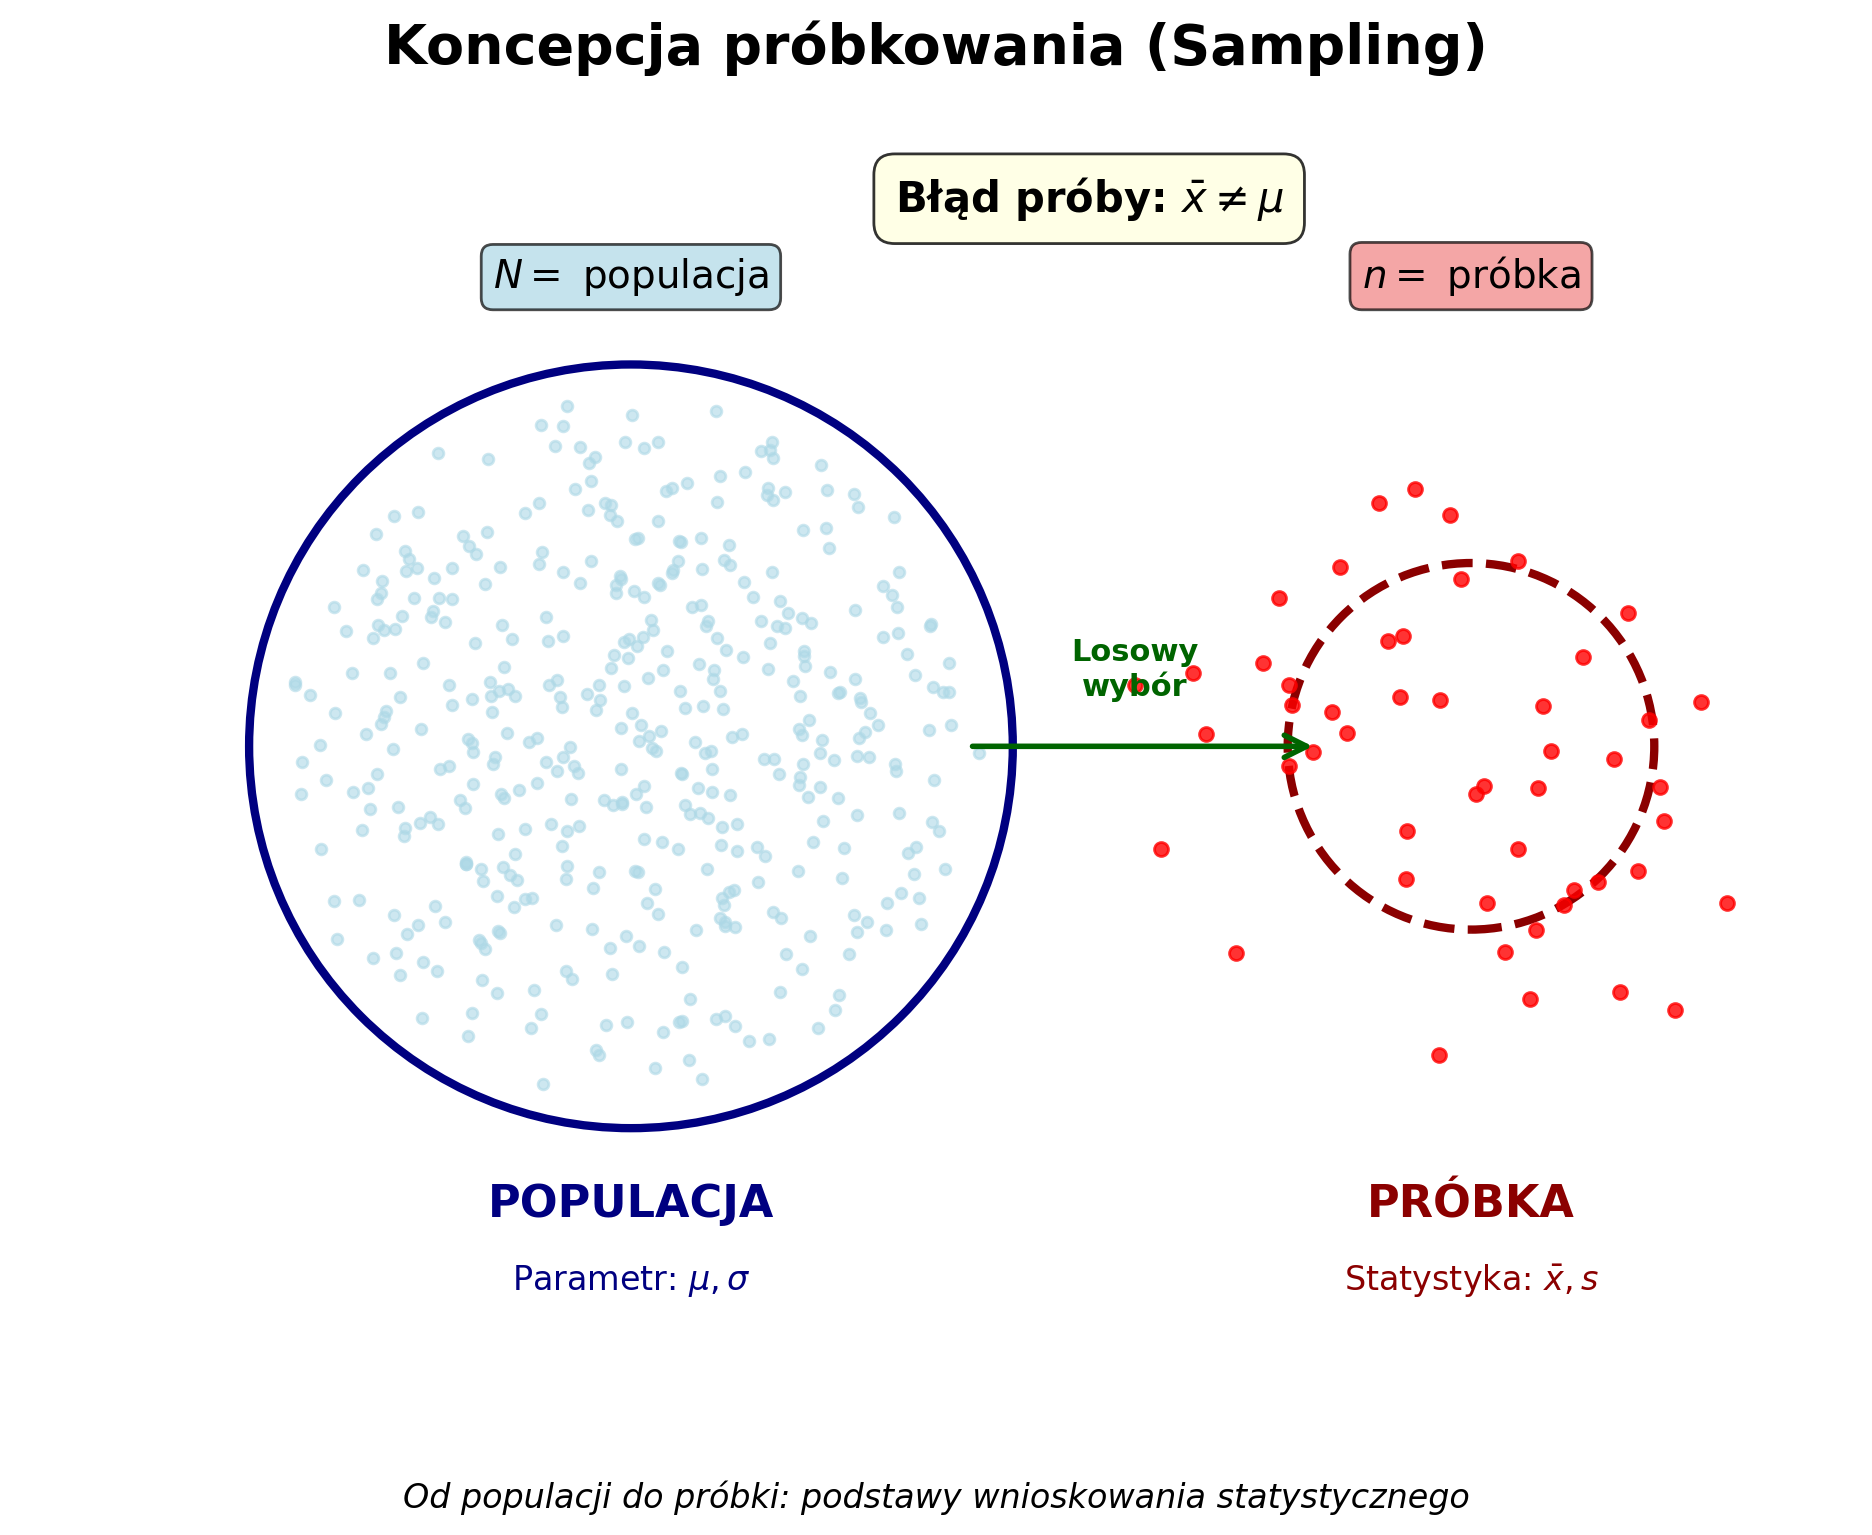

In [5]:
## Koncepcja samplingu

exec(open('sampling_pic.py').read())

## Cele tego rozdziału

Jest to ostatni wykład przed przejściem do **modelowania statystycznego**.

Ma on kilka celów:

- Przejście od czysto **statystyki opisowej** (`średnia` itp.) do [**wnioskowania statystycznego**](https://en.wikipedia.org/wiki/Statistical_inference).  
  - Rozróżnienie między **próbkami** a **populacjami**.
  - Rozpoznawanie **błędu próby**.
- **Błąd standardowy** i podstawy rozkładów próbnych.

## Statystyka opisowa a wnioskowanie statystyczne

W „zestawie narzędzi” statystyki znajdują się co najmniej dwie półki:

- **Statystyka opisowa**: opisuje posiadane dane (np. `średnia`, `mediana`, `odchylenie standardowe` itp.).
- **Statystyka matematyczna**: próbuje uogólnić posiadane dane na szerszą **populację**.

### Próbki a populacje

> W statystyce **populacja** to zbiór *potencjalnych* obserwacji, które nas interesują. Pełen n z N zbiór.

Rzadko zdarza się, abyśmy mogli obserwować całą populację, która nas interesuje, chyba że jest ona bardzo wąska.
 - Na przykład „wszyscy ludzie na świecie” to bardzo szeroka populacja.
 - Nawet „wszyscy studenci PG” to duża populacja.

Dlatego zazwyczaj opieramy się na **próbie**.

> **Próba** to *rzeczywisty* zbiór obserwacji pobranych z populacji. 

### Wyzwanie związane z uogólnianiem

Aby dokonać uogólnienia, próbki muszą być **losowe** i **reprezentatywne**.

- W przeciwnym razie możemy **nadmiernie reprezentować** lub **niedostatecznie reprezentować** niektóre subpopulacje.  

Niestety, wiele próbek to **„próbki wygodne”** – czyli te, które są dostępne w danym momencie.

#### Pytanie 1.

Jaki przykład z wcześniejszej części zajęć pokazuje, jak niereprezentatywna próba może prowadzić do **obciążonych** modeli?

### Błąd próby: kolejne wyzwanie

Nawet jeśli próba jest reprezentatywna, nigdy nie jest identyczna z populacją bazową.

> **Błąd próby** oznacza, że statystyki obliczone na podstawie próby (np. średnia) rzadko (o ile w ogóle) będą identyczne z parametrem populacji bazowej.

# Średnia z próby

**Średnia próby** ($\bar{X}$) rzadko, jeśli w ogóle, będzie identyczna ze **średnią populacji** ($\mu$).

## Symulacja 1.

In [3]:
## Najpierw należy utworzyć „populację”.
np.random.seed(10)
pop = np.random.normal(loc = 0, scale = 3, size = 1000)
pop.mean()

np.float64(-0.04366990684641133)

In [4]:
## Teraz pobierz próbkę z tej populacji za pomocą np.sample
sample = np.random.choice(pop, size = 100)
sample.mean()

np.float64(-0.17870546982513766)

#### Pytanie 2.

Co by było, gdybyśmy pobrali *kilka* próbek z naszej populacji, wszystkie tej samej wielkości, i obliczyli średnią każdej próbki?

- Jak moglibyśmy *nazwać* ten zestaw statystyk próbek?
- Jak myślisz, co byłoby prawdą w odniesieniu do „średniej” tego zestawu statystyk próbek?

#### Odpowiedź

Nazywa się to **rozkładem próbkowym**.

Ten **rozkład próbkowy** będzie miał rozkład normalny wokół rzeczywistej średniej populacyjnej!

## Wprowadzenie do *rozkładów z próby*

> **Rozkład z próby** to rozkład statystyk próbnych (np. `średniej`) pobranych ze *wszystkich możliwych* prób o wielkości $n$.

### Rozkłady próbkowe w praktyce

Najpierw symulujemy naszą podstawową populację bazową.

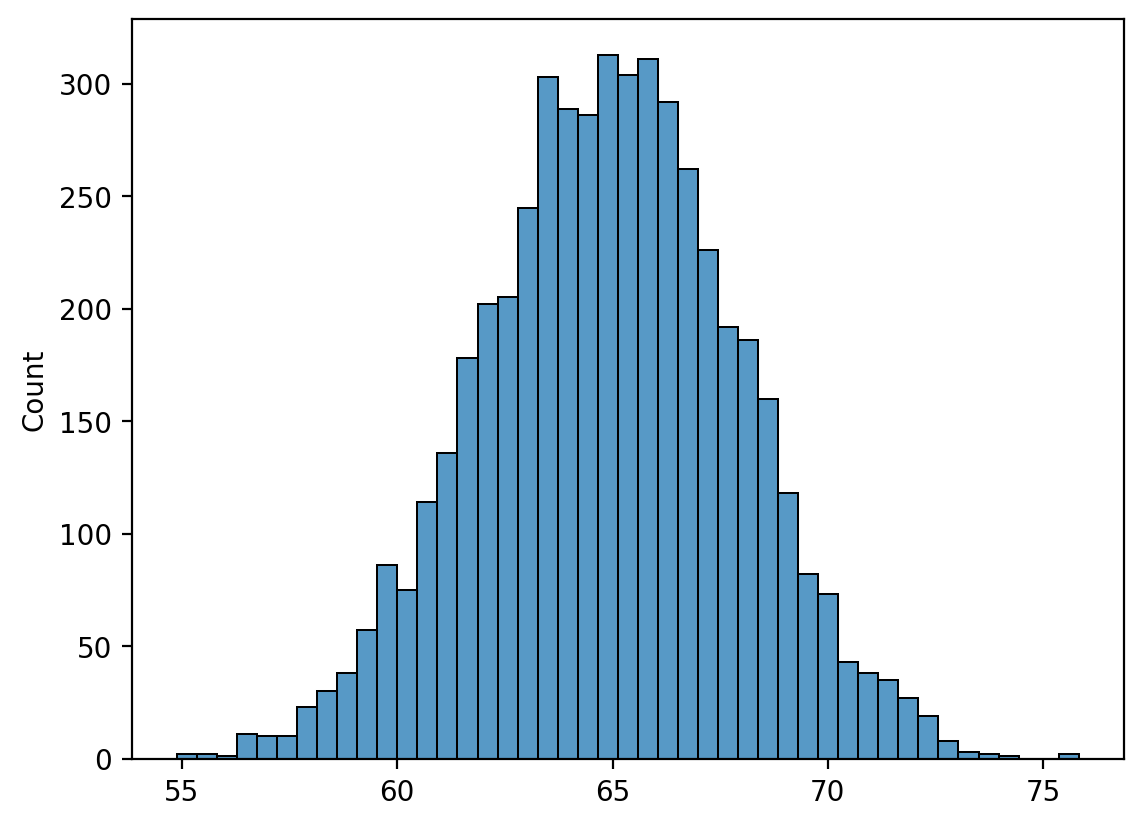

In [5]:
np.random.seed(seed=10)
pop = np.random.normal(loc = 65, scale = 3, size = 5000)
g = sns.histplot(pop)

#### Tworzenie rozkładu próby

Teraz pobieramy próbki z tej populacji 300 razy, przy czym wielkość każdej próbki wynosi $n = 5$. 

Co zauważamy w rozkładzie średnich tych próbek? (Należy pamiętać, że nie jest to „prawdziwy” rozkład próby, ponieważ nie obejmuje on wszystkich możliwych próbek).

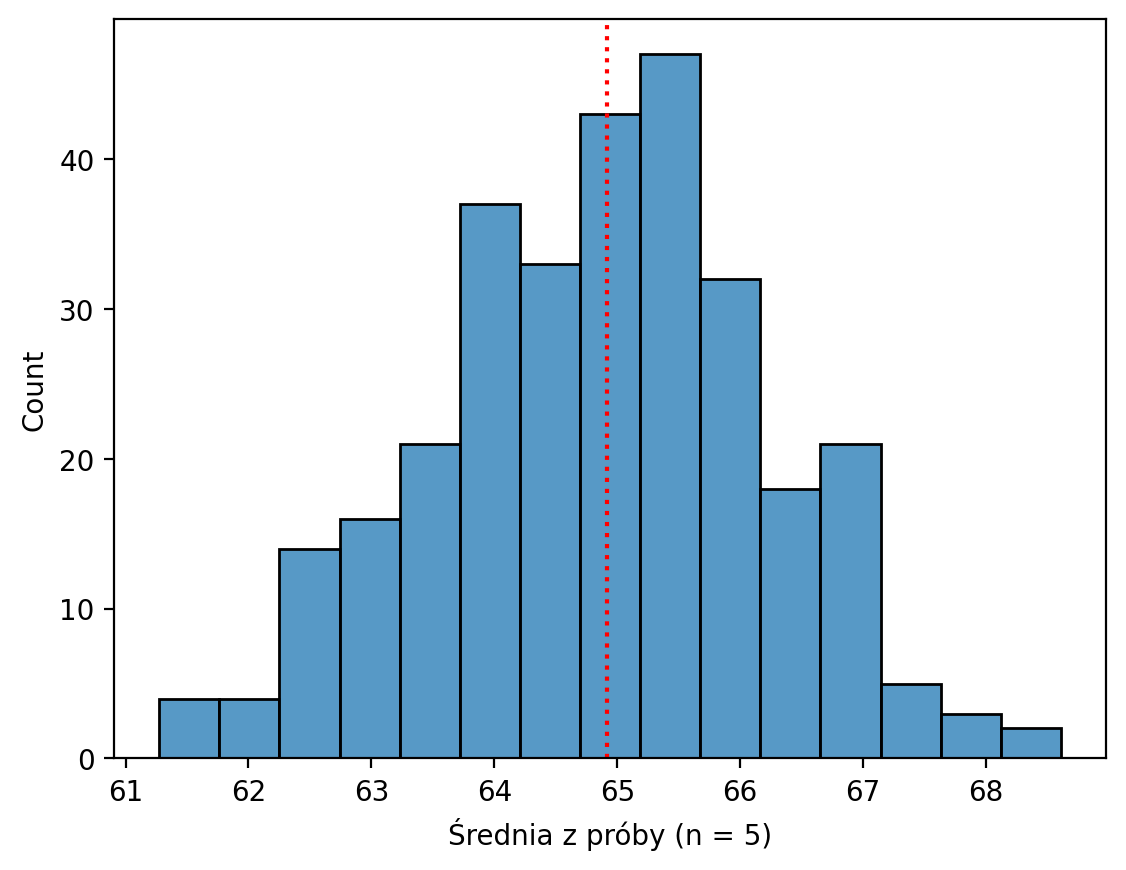

In [7]:
sample_means_n5 = []
for _ in range(300):
    sample = np.random.choice(pop, size = 5, replace = False)
    sample_means_n5.append(sample.mean())
    
g = sns.histplot(sample_means_n5)
plt.xlabel("Średnia z próby (n = 5)")
plt.axvline(pop.mean(), linestyle = "dotted", color = "red");

### Dlaczego $n$ ma znaczenie

Porównajmy teraz kilka rozkładów:

- Populacja pierwotna
- Rozkład próby przy $n = 15$
- Rozkład próby przy $n = 40$

#### Tworzenie nowego rozkładu próbkowania, gdzie $n=40$

In [9]:
sample_means_n40 = []
for _ in range(300):
    sample = np.random.choice(pop, size = 40, replace = False)
    sample_means_n40.append(sample.mean())

#### Wizualizacja obok siebie

Co zauważamy w rozkładzie próbkowania, gdy $n$ staje się większe?

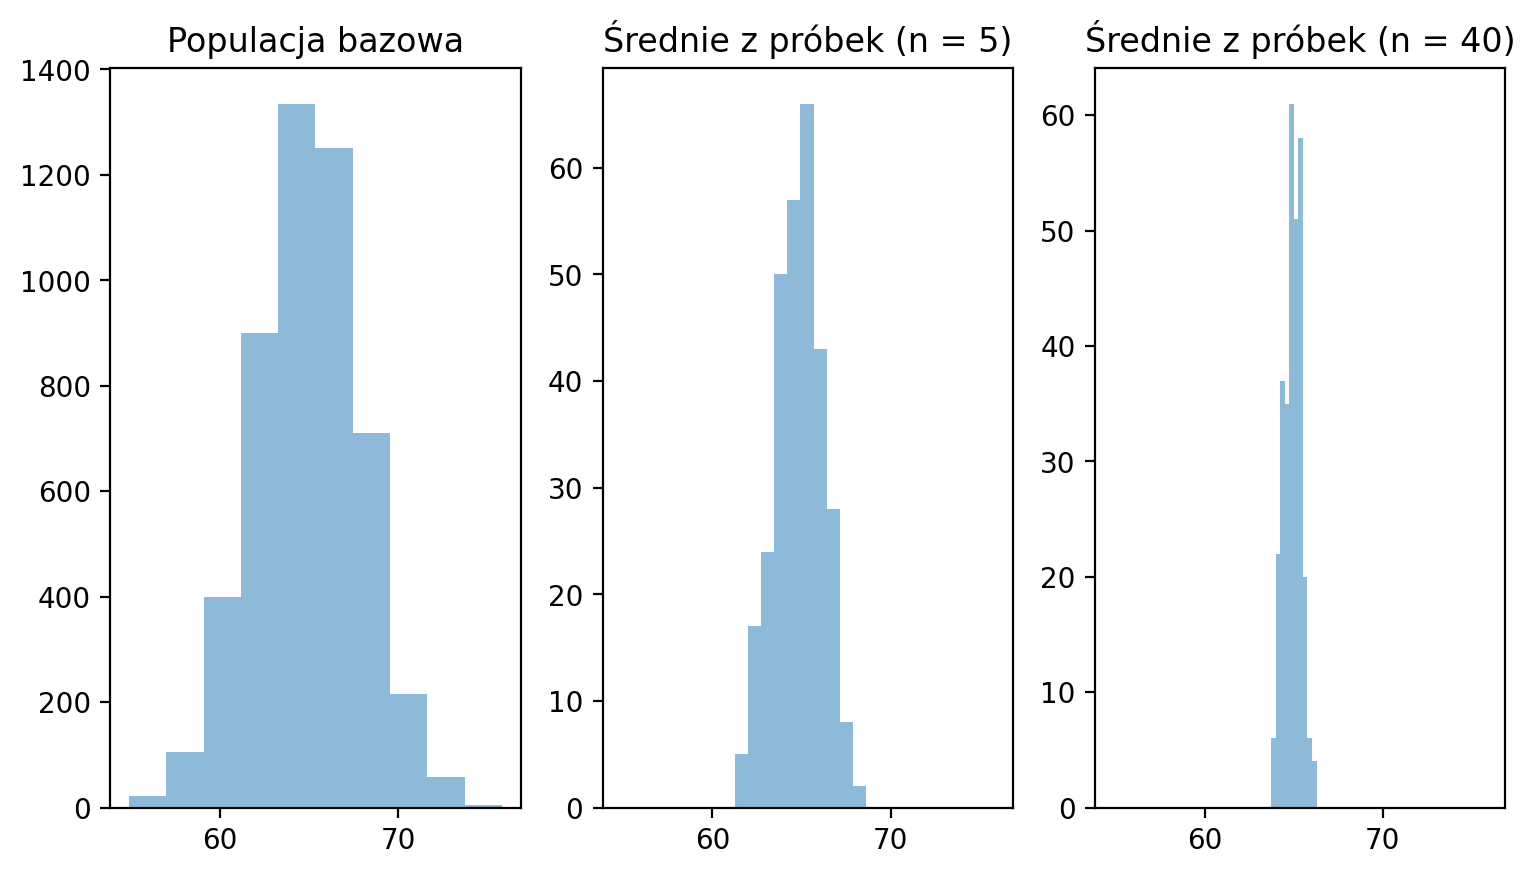

In [10]:
# Teraz wizualizujemy je wszystkie razem.
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex = True)
f.set_figwidth(9)
og = ax1.hist(pop, alpha = .5)
ax1.title.set_text("Populacja bazowa")
og_s1 = ax2.hist(sample_means_n5, alpha = .5)
ax2.title.set_text("Średnie z próbek (n = 5)")
og_s2 = ax3.hist(sample_means_n40, alpha = .5)
ax3.title.set_text("Średnie z próbek (n = 40)")

### Dlaczego $n$ ma znaczenie (powtórka)

Wraz ze wzrostem wartości $n$:

- Rozkład próby staje się coraz bardziej **normalny**.
- Wariancja naszego rozkładu próby **maleje**.

Jest to w istocie [centralne twierdzenie graniczne](https://en.wikipedia.org/wiki/Central_limit_theorem).

> Im większa próba, tym bardziej rozkład statystyki z próby zbliża się do rozkładu normalnego, nawet jeśli zmienna, którą mierzymy, nie posiada rozkładu normalnego. 

Dotyczy to nawet **rozkładów asymetrycznych**!

### Kwantyfikacja wariancji rozkładu próbkowego

Większa wartość $n$ powinna zwiększyć nasze przekonanie, że **statystyka próbkowa** jest dobrym przybliżeniem **parametru populacyjnego**.

- Większa wartość $n$ oznacza mniejszą *wariancję* naszego rozkładu próbkowego.
- To z kolei oznacza, że *każda dana* statystyka próbkowa jest stosunkowo bliska parametrowi populacyjnemu.

Jak możemy *kwantyfikować* wielkość wariancji w naszym hipotetycznym rozkładzie próbkowym?

## Wprowadzenie pojęcia *błędu standardowego*

> **Błąd standardowy** pozwala nam zmierzyć wariancję naszego *rozkładu próbkowego*.

**Błąd standardowy (SE)** definiuje się jako:

$\Large SE = \frac{s}{\sqrt{n}}$

Gdzie $s$ jest odchyleniem standardowym próby.

### Pytanie 3.

Czym różni się **błąd standardowy** od **odchylenia standardowego**?

### Błąd standardowy zależy od $n$

- Odchylenie standardowe jest niezmienne względem *wielkości* naszej próby.
- Błąd standardowy maleje wraz ze wzrostem wielkości próby ($n$).
   - SE *odzwierciedla* zarówno odchylenie standardowe, jak i $n$.

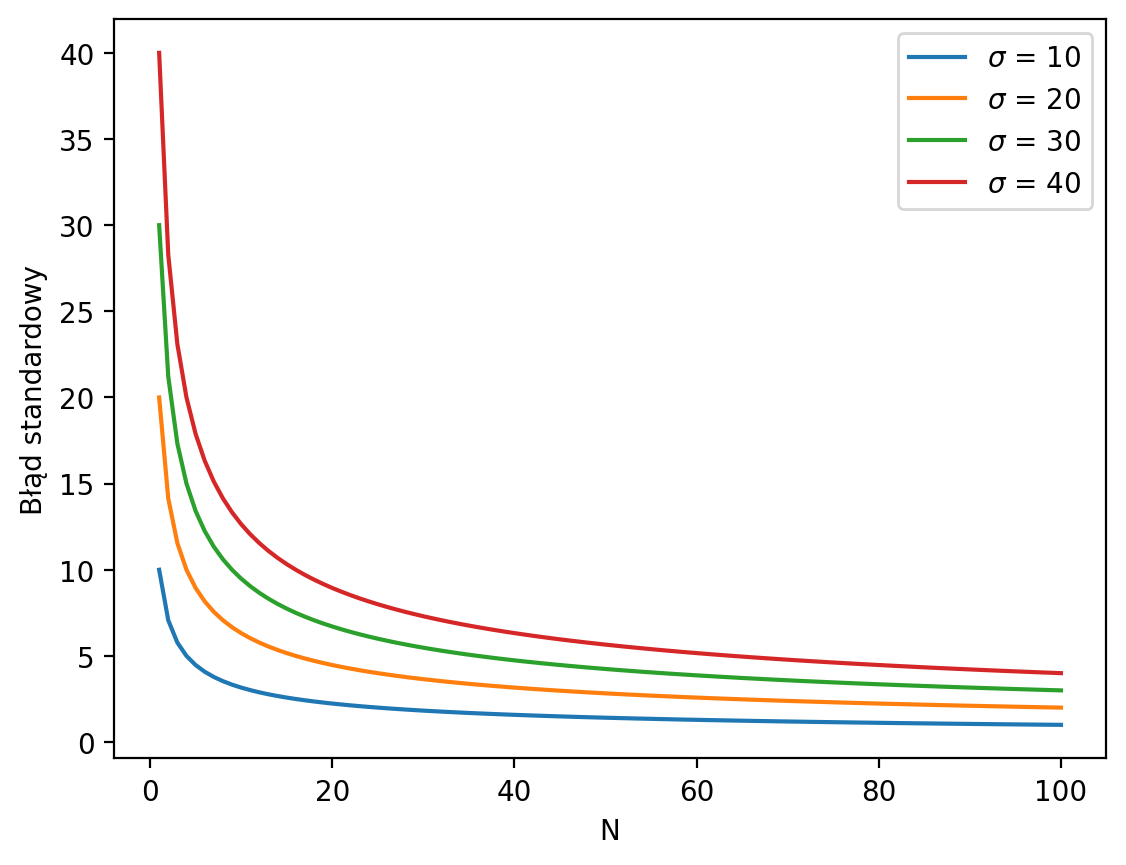

In [18]:
Ns = np.linspace(1, 100, num = 100)
for sigma in [10, 20, 30, 40]:
    se = sigma / np.sqrt(Ns)
    plt.plot(Ns, se, label = r"$\sigma$ = {x}".format(x=sigma))  # Dodaj 'r' przed stringiem
plt.legend();
plt.xlabel("N");
plt.ylabel("Błąd standardowy");

### Obliczanie SE za pomocą `pandas`

`pandas` udostępnia funkcję (`sem`) do obliczania błędu standardowego średniej (SE) bezpośrednio w kolumnie.

In [19]:
df_height = pd.read_csv("data/wrangling/height.csv")
df_height['Father'].sem()

np.float64(0.08363032857029366)

### Raportowanie błędu standardowego

Powszechną metodą wykorzystania błędu standardowego jest **raportowanie** go wraz ze średnią z próby:

> Średnia z naszej próby wyniosła 25 USD, ± 3,5 (SE).  

Symbol „±” oznacza po prostu pewną **niepewność** dotyczącą naszej statystyki próby.  

---

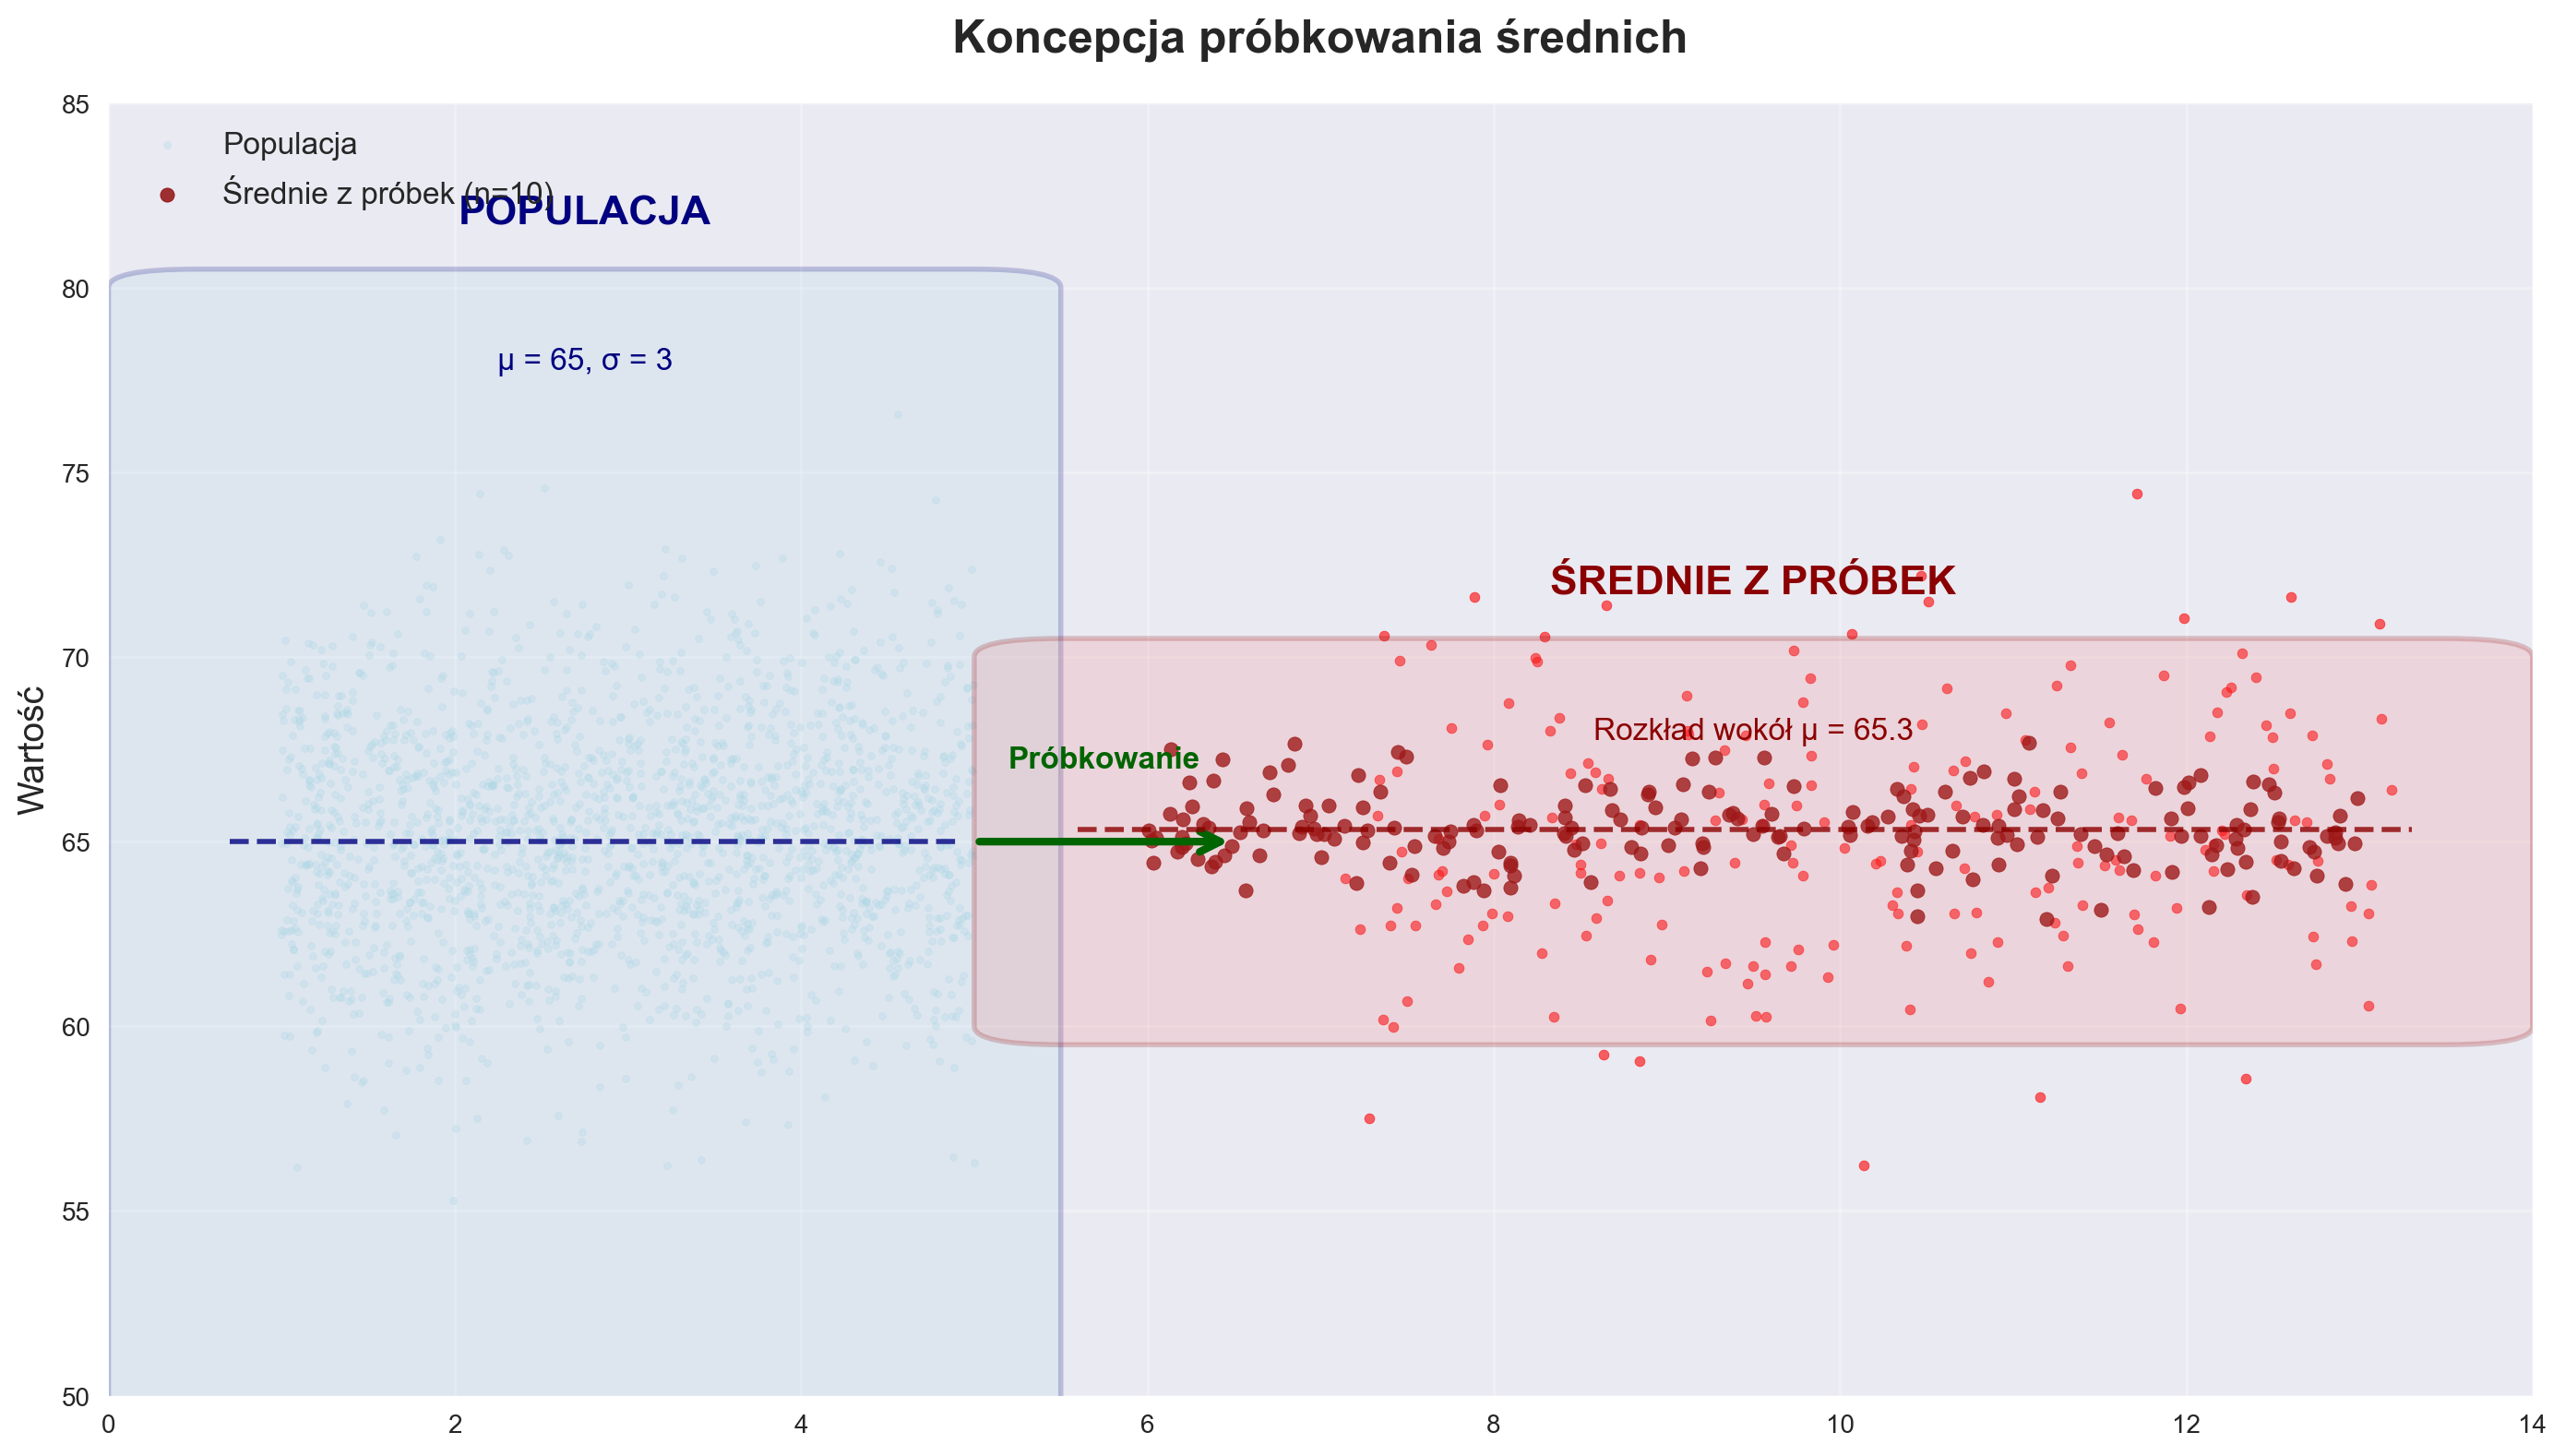

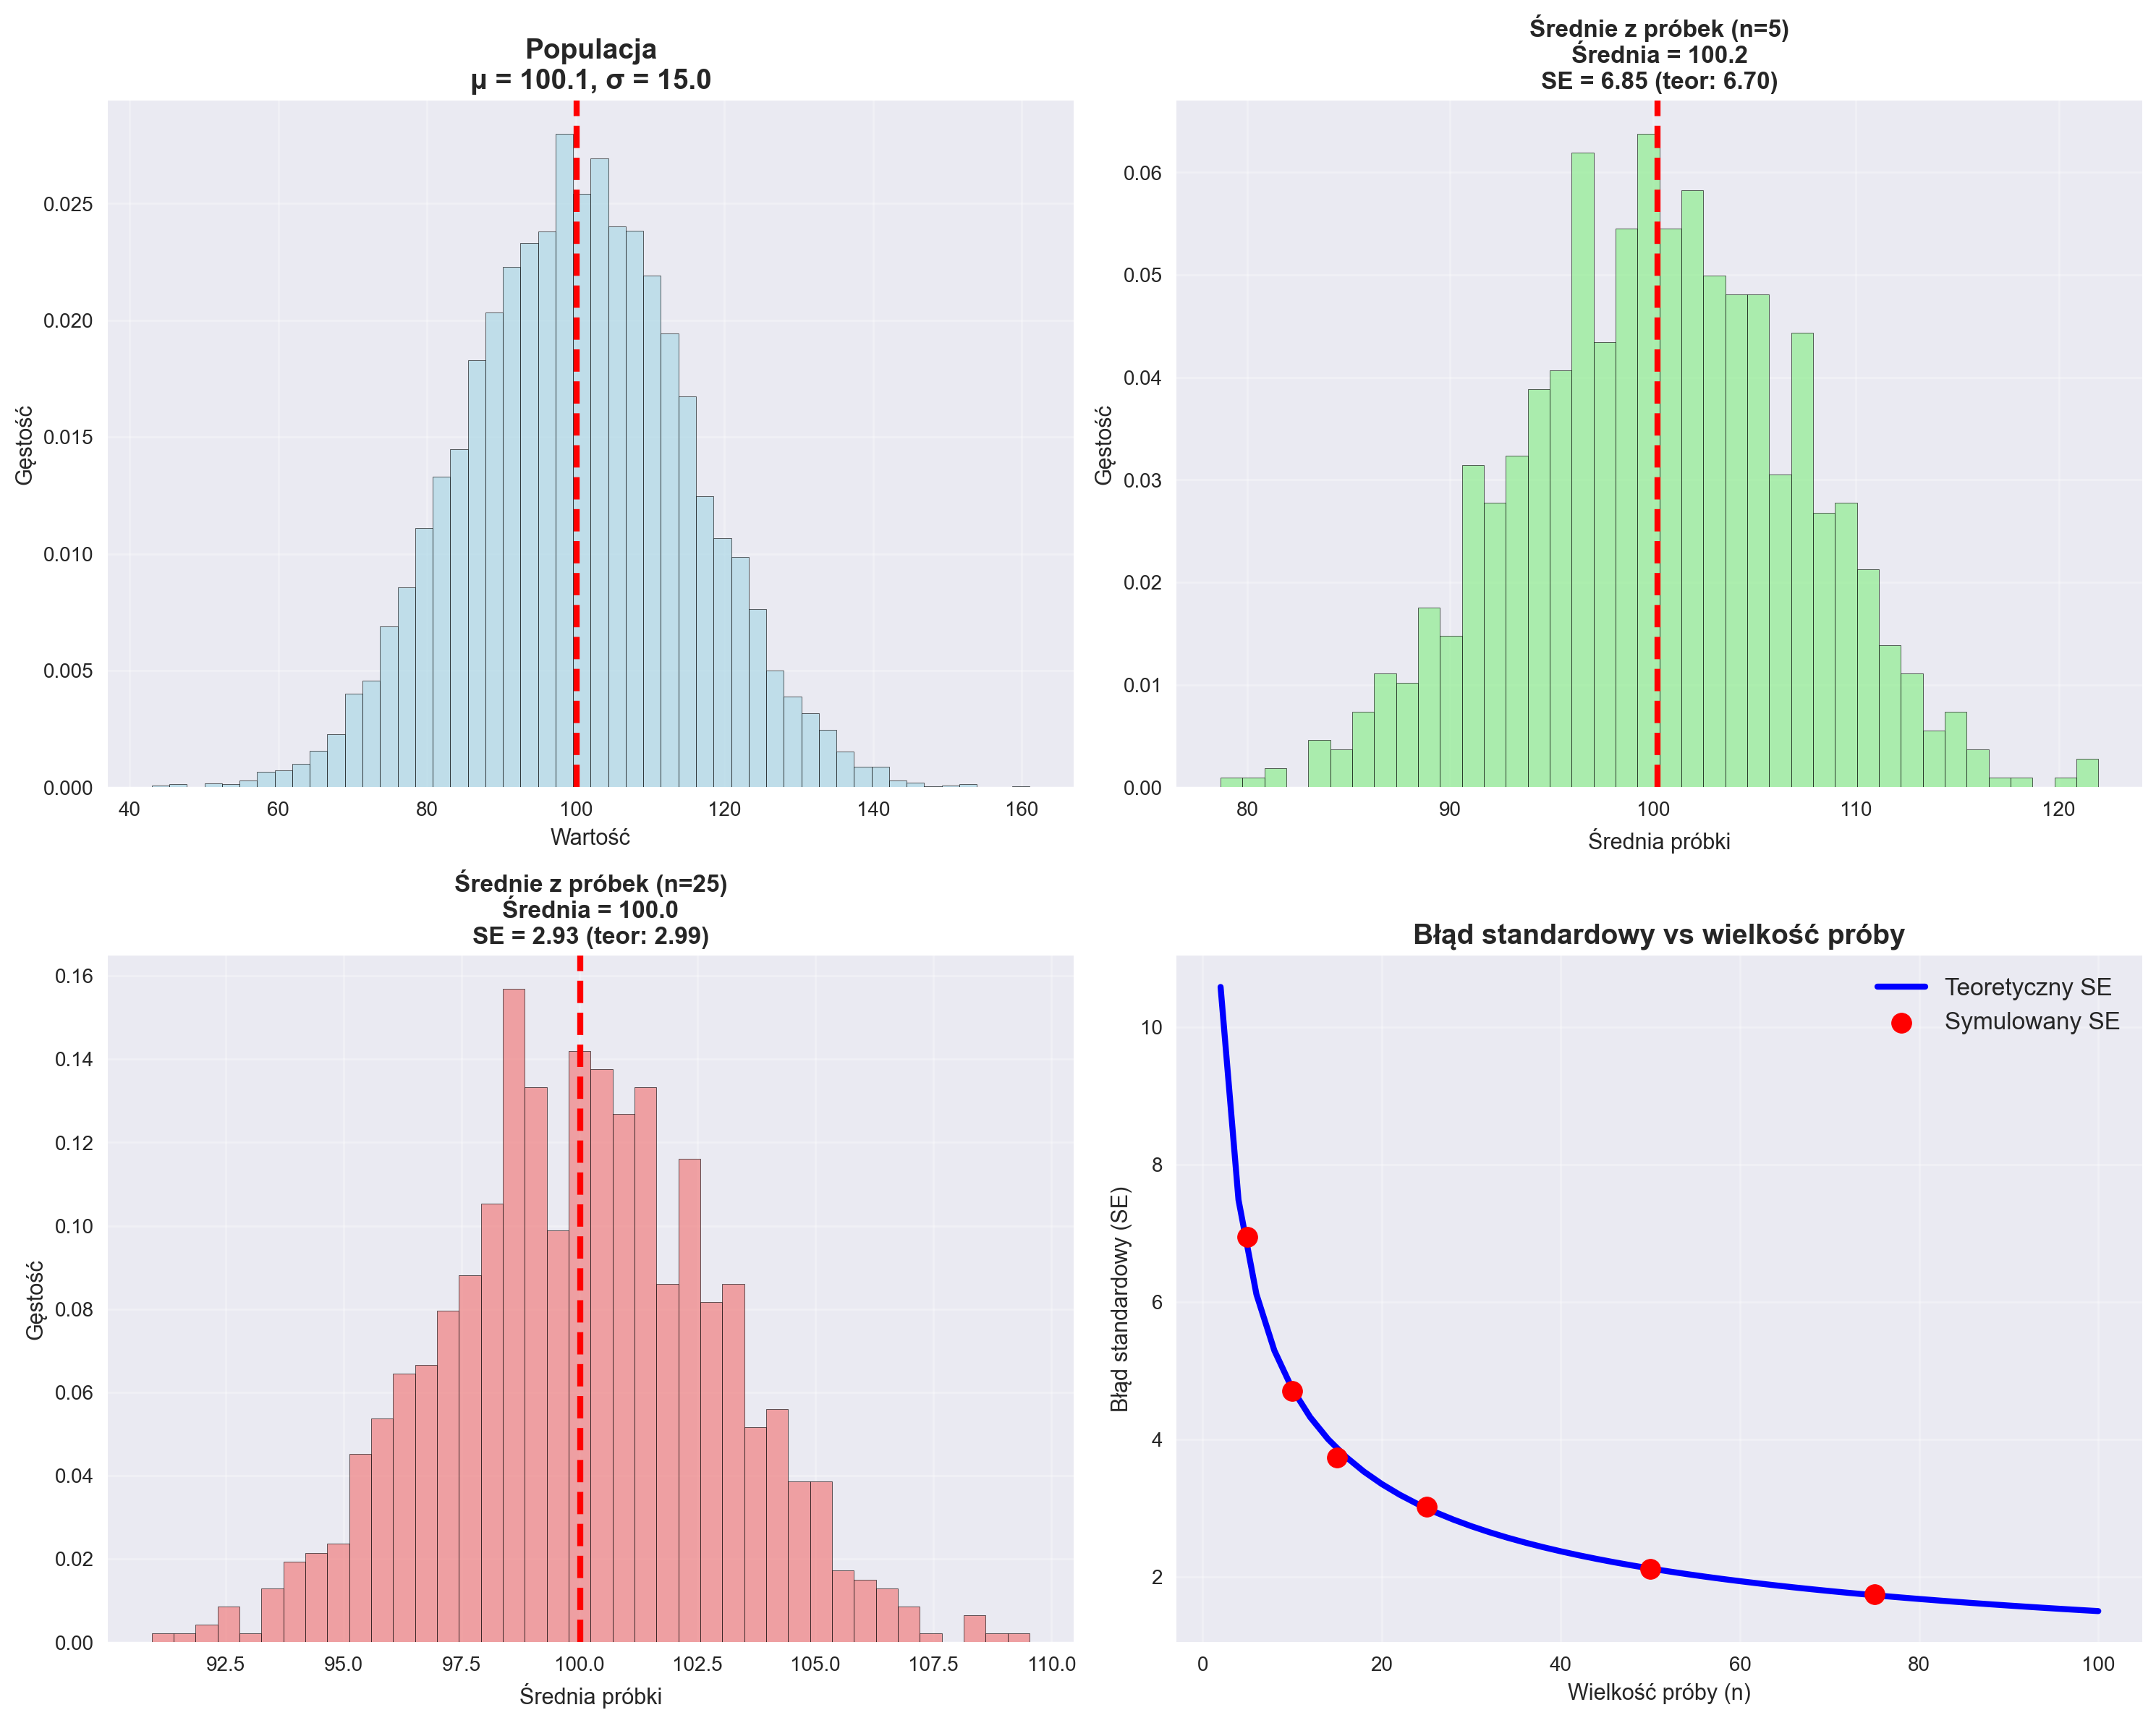

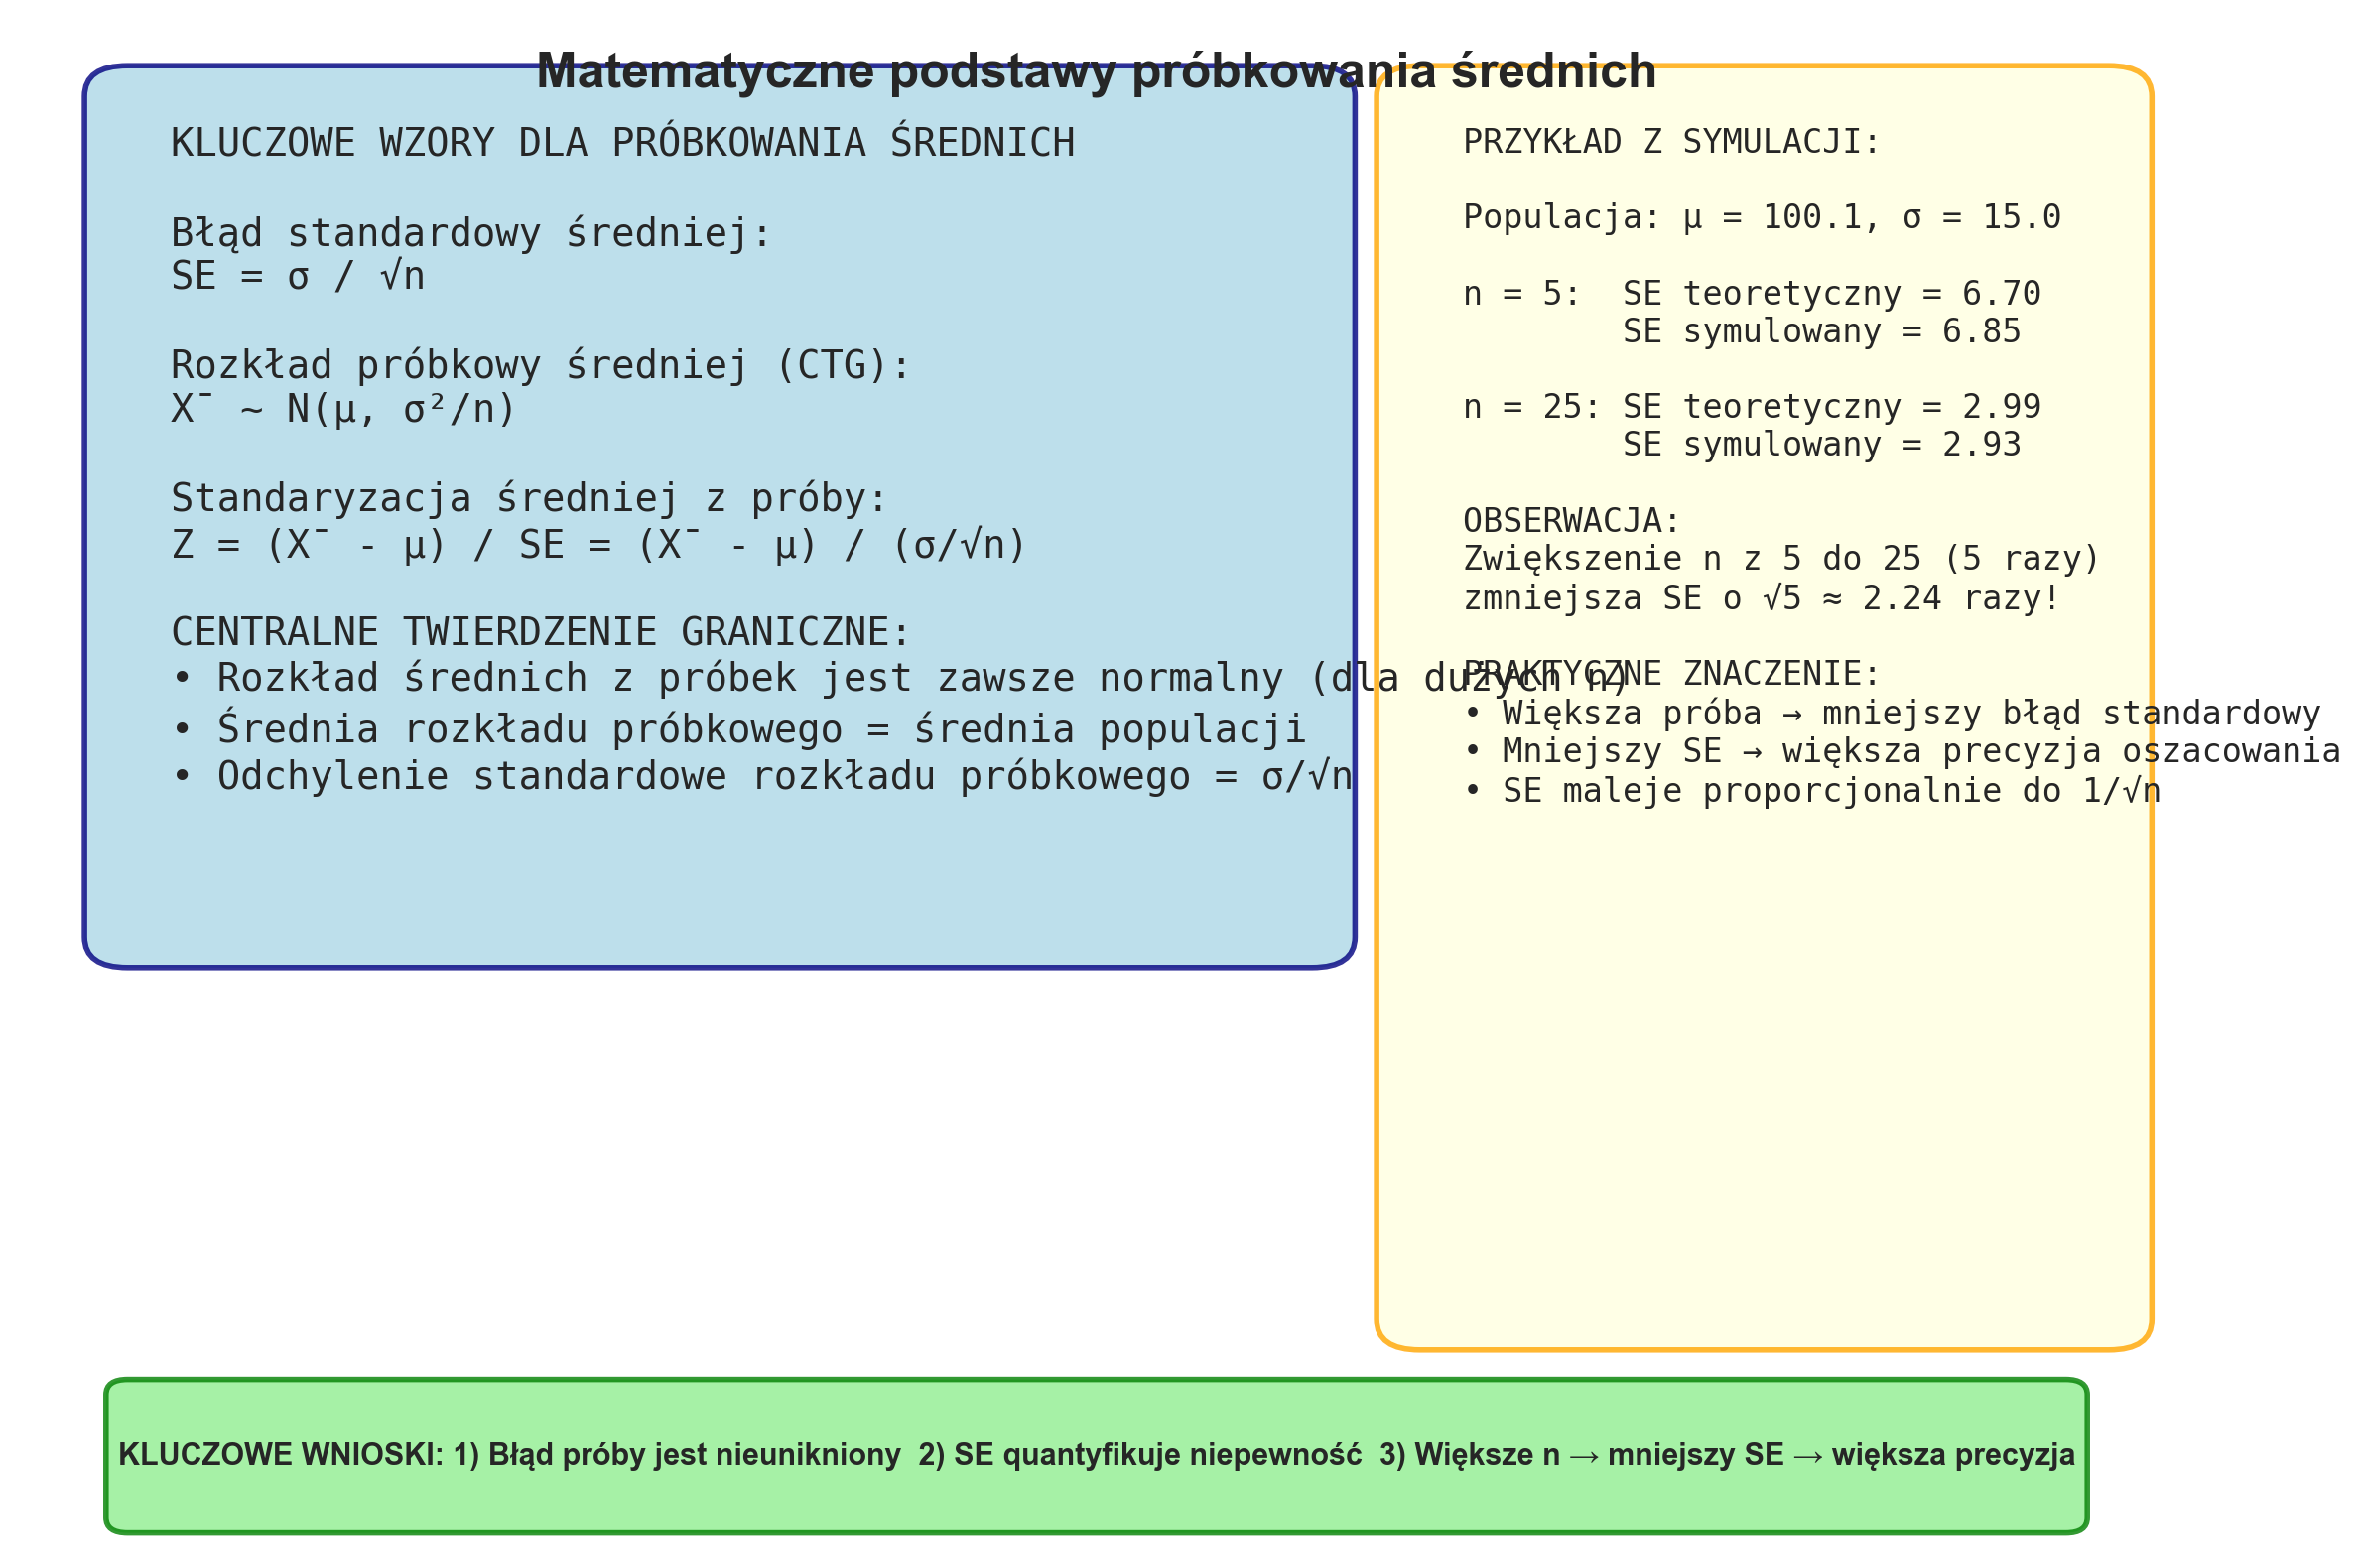

PODSUMOWANIE SYMULACJI PRÓBKOWANIA ŚREDNICH
Populacja: μ = 100.15, σ = 14.97
Liczba symulacji: 1000 dla każdej wielkości próby

WYNIKI:
n=5:  Średnia próbkowa = 100.21, SE = 6.85
n=25: Średnia próbkowa = 100.02, SE = 2.93

WERYFIKACJA WZORU SE = σ/√n:
n=5:  SE teoretyczny = 6.70, SE empiryczny = 6.85
n=25: SE teoretyczny = 2.99, SE empiryczny = 2.93

Stosunek SE: 2.34 (teoretyczny: 2.24)


In [9]:
## Koncepcja samplingu
exec(open('sampling_srednie.py').read())

---

## Podsumowanie - średnia z próby

To kończy nasze krótkie wprowadzenie do **statystyki matematycznej**.

Jego celem było przede wszystkim przedstawienie kilku kluczowych pojęć:

- Błąd próby: statystyka próby ≠ parametr populacji.
- Rozkłady próby: rozkład wszystkich statystyk próby z prób o wielkości $n$.
- Błąd standardowy: kwantyfikacja wariancji w naszym rozkładzie próby.

Wszystkie te pojęcia pomogą w przyszłych dyskusjach na temat modelowania statystycznego.

---

## Rozkład normalny - teoria w kontekście Symulacji 1.

### Definicja rozkładu normalnego

**Rozkład normalny** (zwany także rozkładem Gaussa) to jeden z najważniejszych rozkładów prawdopodobieństwa w statystyce. Jest to rozkład ciągły, który charakteryzuje się charakterystyczną krzywą w kształcie dzwonu.

### Funkcja gęstości prawdopodobieństwa

Rozkład normalny opisuje wzór:

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

gdzie:
- $\mu$ – **średnia** (parametr położenia)
- $\sigma$ – **odchylenie standardowe** (parametr skali)  
- $\sigma^2$ – **wariancja**

Zapisujemy to jako: $X \sim \mathcal{N}(\mu, \sigma^2)$

### Właściwości rozkładu normalnego

1. **Symetryczność** – krzywa jest symetryczna względem średniej $\mu$
2. **Kształt dzwonu** – ma charakterystyczny kształt przypominający dzwon
3. **Asymptoty** – „ogony" krzywej zbliżają się do zera, ale nigdy jej nie osiągają
4. **Reguła 68-95-99,7** (reguła trzech sigm):
   - $68\%$ obserwacji mieści się w przedziale $[\mu - \sigma, \mu + \sigma]$
   - $95\%$ obserwacji mieści się w przedziale $[\mu - 2\sigma, \mu + 2\sigma]$
   - $99{,}7\%$ obserwacji mieści się w przedziale $[\mu - 3\sigma, \mu + 3\sigma]$

### W kontekście Symulacji 1

W naszej symulacji:
- Tworzymy **populację** z rozkładu normalnego: $\mathcal{N}(\mu=0, \sigma^2=9)$, czyli $\sigma=3$
- Pobieramy z niej próbki i obliczamy ich średnie  
- **Rozkład średnich z próbek** również będzie normalny (zgodnie z CTG)

### Centralne Twierdzenie Graniczne (CTG)

Najważniejsze twierdzenie w kontekście rozkładu normalnego:

> **Niezależnie od kształtu rozkładu populacji**, rozkład średnich z próbek o wystarczająco dużej wielkości $n$ będzie zbliżony do rozkładu normalnego.

Matematycznie:

$$\bar{X} \sim \mathcal{N}\left(\mu, \frac{\sigma^2}{n}\right)$$

gdzie:
- $\bar{X}$ – średnia z próby
- $\mu$ – średnia populacji  
- $\frac{\sigma^2}{n}$ – wariancja rozkładu próby (maleje wraz ze wzrostem $n$!)

### Błąd standardowy średniej

**Błąd standardowy średniej** to odchylenie standardowe rozkładu próby średnich:

$$SE(\bar{X}) = \sqrt{\frac{\sigma^2}{n}} = \frac{\sigma}{\sqrt{n}}$$

### Standardowy rozkład normalny

Szczególny przypadek: $\mathcal{N}(0, 1)$ – rozkład o średniej $0$ i odchyleniu standardowym $1$.

**Standaryzacja:**

$$Z = \frac{X - \mu}{\sigma} \sim \mathcal{N}(0, 1)$$

**Standaryzacja dla średniej z próby:**

$$Z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}} = \frac{\bar{X} - \mu}{SE(\bar{X})} \sim \mathcal{N}(0, 1)$$

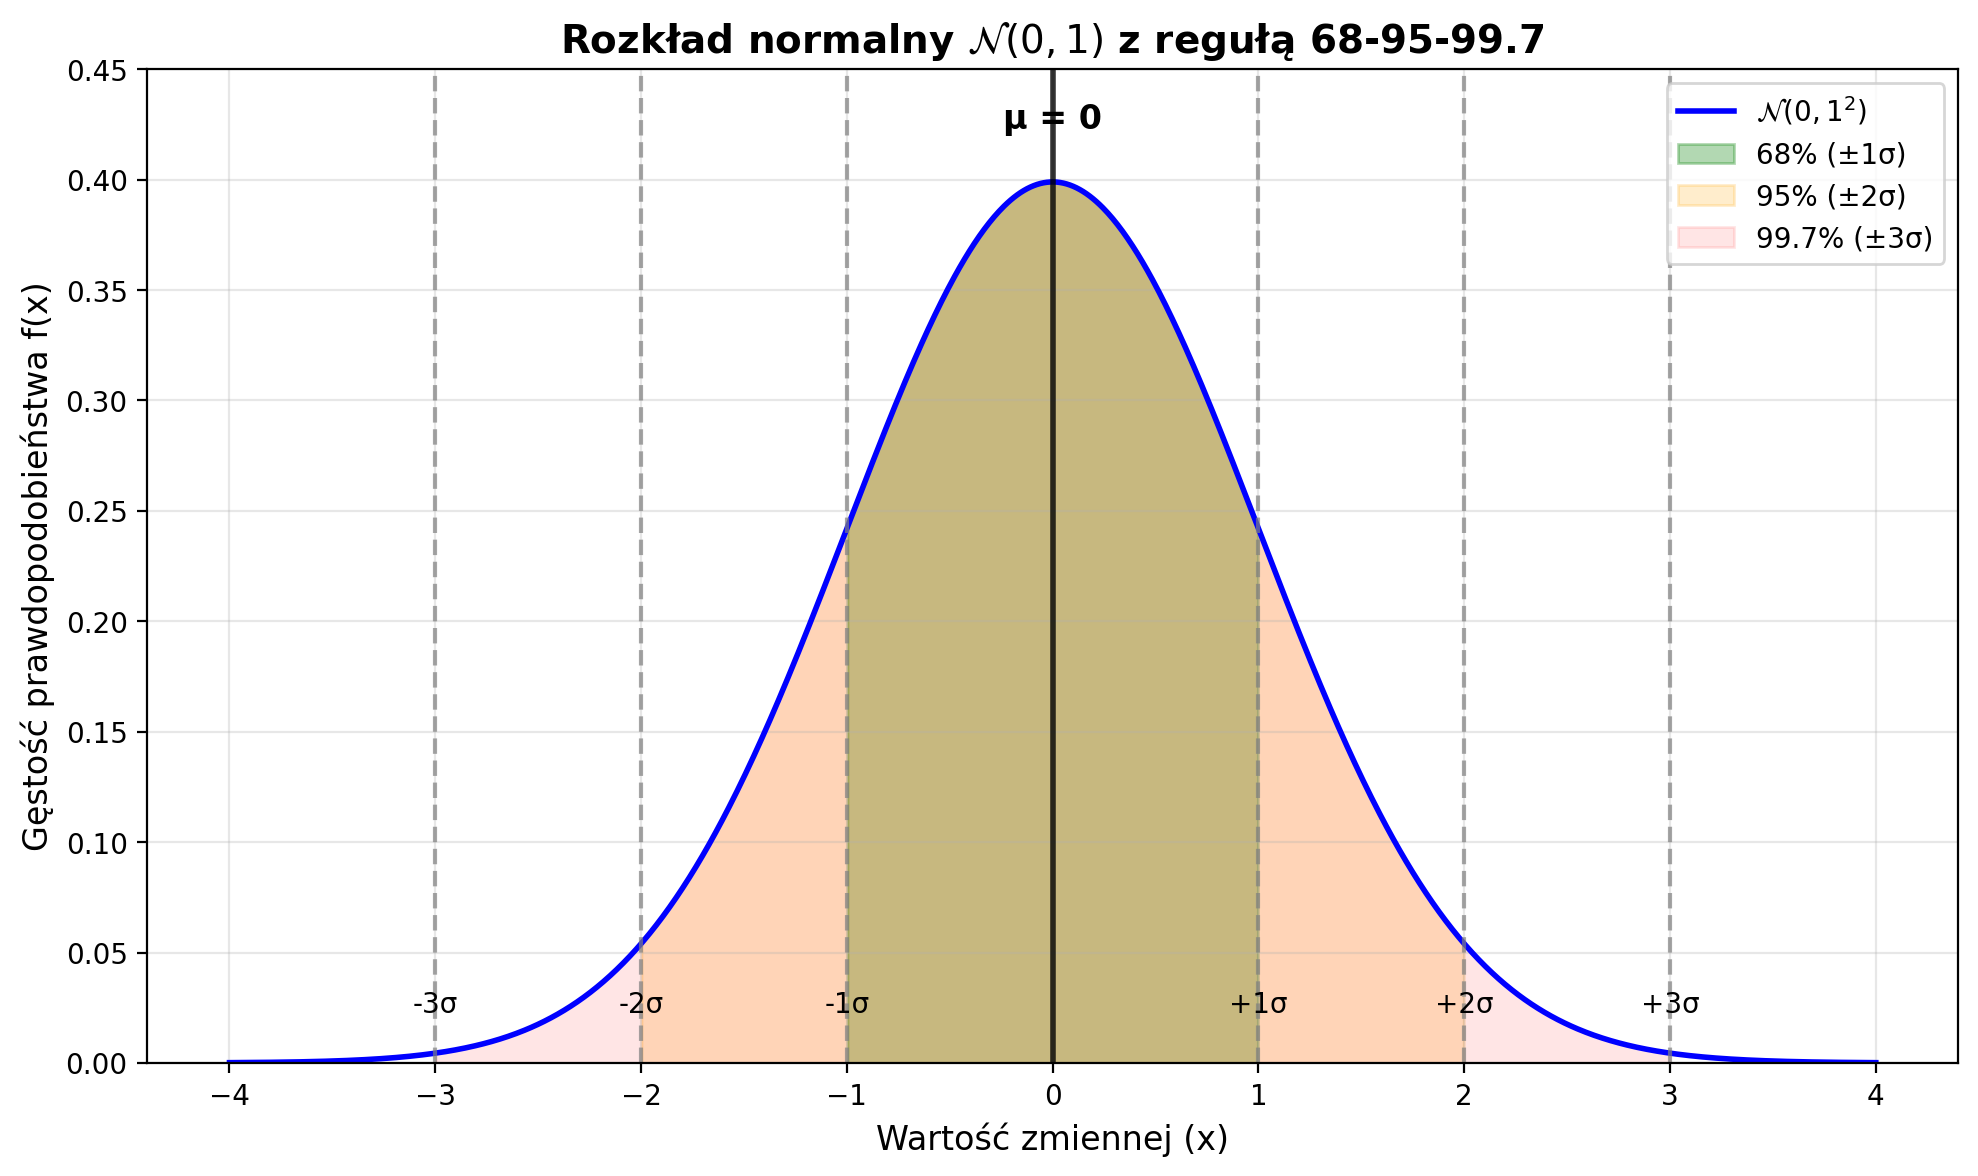

In [27]:
# Parametry rozkładu normalnego
mu = 0  # średnia
sigma = 1  # odchylenie standardowe

# Zakres wartości x
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, mu, sigma)

# Tworzenie wykresu
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Rysowanie krzywej gęstości
ax.plot(x, y, 'b-', linewidth=2, label=f'$\\mathcal{{N}}({mu}, {sigma}^2)$')

# Zakreskowanie obszarów zgodnie z regułą 68-95-99.7
# 68% - 1 sigma
x_1sigma = x[(x >= mu - sigma) & (x <= mu + sigma)]
y_1sigma = stats.norm.pdf(x_1sigma, mu, sigma)
ax.fill_between(x_1sigma, y_1sigma, alpha=0.3, color='green', 
                label='68% (±1σ)')

# 95% - 2 sigma  
x_2sigma = x[(x >= mu - 2*sigma) & (x <= mu + 2*sigma)]
y_2sigma = stats.norm.pdf(x_2sigma, mu, sigma)
ax.fill_between(x_2sigma, y_2sigma, alpha=0.2, color='orange',
                label='95% (±2σ)')

# 99.7% - 3 sigma
x_3sigma = x[(x >= mu - 3*sigma) & (x <= mu + 3*sigma)]
y_3sigma = stats.norm.pdf(x_3sigma, mu, sigma)
ax.fill_between(x_3sigma, y_3sigma, alpha=0.1, color='red',
                label='99.7% (±3σ)')

# Dodanie linii pionowych dla σ
for i in range(1, 4):
    ax.axvline(mu + i*sigma, color='gray', linestyle='--', alpha=0.7)
    ax.axvline(mu - i*sigma, color='gray', linestyle='--', alpha=0.7)
    ax.text(mu + i*sigma, 0.02, f'+{i}σ', ha='center', va='bottom')
    ax.text(mu - i*sigma, 0.02, f'-{i}σ', ha='center', va='bottom')

# Dodanie linii dla średniej
ax.axvline(mu, color='black', linestyle='-', linewidth=2, alpha=0.8)
ax.text(mu, 0.42, 'μ = 0', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Formatowanie wykresu
ax.set_xlabel('Wartość zmiennej (x)', fontsize=12)
ax.set_ylabel('Gęstość prawdopodobieństwa f(x)', fontsize=12)
ax.set_title('Rozkład normalny $\\mathcal{N}(0, 1)$ z regułą 68-95-99.7', fontsize=14, fontweight='bold')
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)
ax.set_ylim(0, 0.45)

plt.tight_layout()
plt.show()

---

### Rozkład t-Studenta

**Rozkład t-Studenta** (zwany także rozkładem Studenta) to jeden z najważniejszych rozkładów w statystyce praktycznej, szczególnie gdy nie znamy prawdziwego odchylenia standardowego populacji.

#### Dlaczego potrzebujemy rozkładu t-Studenta?

W praktyce rzadko znamy **prawdziwe odchylenie standardowe populacji** $\sigma$. Zamiast tego musimy je **estymować** z próby używając $s$ (odchylenie standardowe próby).

**Problem z rozkładem normalnym:**
Gdy używamy szacunku $s$ zamiast prawdziwego $\sigma$, statystyka:

$$Z = \frac{\bar{X} - \mu}{\frac{s}{\sqrt{n}}}$$

**nie ma już** rozkładu normalnego $\mathcal{N}(0,1)$!

#### Definicja rozkładu t-Studenta

Gdy populacja ma rozkład normalny, a $s$ jest odchyleniem standardowym z próby, to:

$$t = \frac{\bar{X} - \mu}{\frac{s}{\sqrt{n}}} \sim t_{n-1}$$

ma **rozkład t-Studenta** z $df = n-1$ **stopniami swobody**.

#### Funkcja gęstości prawdopodobieństwa

$$f(t) = \frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{\nu\pi}\,\Gamma\left(\frac{\nu}{2}\right)} \left(1+\frac{t^2}{\nu}\right)^{-\frac{\nu+1}{2}}$$

gdzie:
- $\nu = n-1$ – liczba stopni swobody
- $\Gamma$ – funkcja gamma

#### Właściwości rozkładu t-Studenta

1. **Symetryczny** względem zera (podobnie jak rozkład normalny)
2. **Grubsze ogony** niż rozkład normalny (większe prawdopodobieństwo wartości ekstremalnych)
3. **Kształt zależy od stopni swobody** $\nu = n-1$
4. **Zbieżność do rozkładu normalnego:** gdy $n \to \infty$, rozkład $t_{\nu} \to \mathcal{N}(0,1)$

#### Parametry rozkładu

- **Średnia:** $E[t] = 0$ (dla $\nu > 1$)
- **Wariancja:** $\text{Var}(t) = \frac{\nu}{\nu-2}$ (dla $\nu > 2$)
- **Odchylenie standardowe:** $\sigma_t = \sqrt{\frac{\nu}{\nu-2}}$

#### Zastosowania w praktyce

**Rozkład t-Studenta używamy gdy:**
- Nie znamy prawdziwego odchylenia standardowego populacji $\sigma$
- Próba jest względnie mała (zwykle $n < 30$)
- Chcemy konstruować **przedziały ufności** dla średniej
- Przeprowadzamy **testy t-Studenta**

**Przykładowy przedział ufności dla średniej:**

$$\bar{x} \pm t_{\alpha/2, n-1} \cdot \frac{s}{\sqrt{n}}$$

gdzie $t_{\alpha/2, n-1}$ to wartość krytyczna z rozkładu t-Studenta.

## Stopnie swobody w rozkładzie t-Studenta

### Co to są stopnie swobody?

**Stopnie swobody** (degrees of freedom, df) to kluczowe pojęcie w statystyce, które określa liczbę niezależnych informacji dostępnych do oszacowania parametru statystycznego.

#### Definicja matematyczna

**Stopnie swobody** to liczba obserwacji w próbie **minus** liczba parametrów, które musimy oszacować z tej próby.

W przypadku średniej z próby:

$$df = n - 1$$

gdzie:
- $n$ – wielkość próby
- $1$ – liczba oszacowanych parametrów (średnia $\bar{x}$)

#### Dlaczego odejmujemy 1?

Gdy obliczamy **odchylenie standardowe próby** $s$, używamy wzoru:

$$s = \sqrt{\frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n-1}}$$

**Kluczowa obserwacja:**
- Mamy $n$ obserwacji: $x_1, x_2, \ldots, x_n$
- Ale gdy znamy średnią $\bar{x}$ oraz $(n-1)$ odchyleń od średniej, to ostatnie odchylenie jest **automatycznie określone**!

#### Przykład intuicyjny

Wyobraź sobie próbę z $n = 3$ obserwacjami: $x_1, x_2, x_3$.

Jeśli wiemy, że:
- $\bar{x} = 5$
- $(x_1 - \bar{x}) = -2$
- $(x_2 - \bar{x}) = +1$

To **automatycznie** $(x_3 - \bar{x}) = +1$, ponieważ suma odchyleń od średniej musi wynosić zero:

$$\sum_{i=1}^{n}(x_i - \bar{x}) = 0$$

#### Wpływ na rozkład t-Studenta

**Im mniejsze stopnie swobody:**
- Tym **grubsze ogony** ma rozkład t-Studenta
- Tym **większa niepewność** w naszych oszacowaniach
- Tym bardziej **ostrożni** musimy być w wnioskach

**Matematycznie:**

$$\text{Var}(t) = \frac{\nu}{\nu-2} \text{ gdzie } \nu = df$$

#### Praktyczne znaczenie

| Wielkość próby ($n$) | Stopnie swobody ($df = n-1$) | Charakterystyka rozkładu |
|---------------------|------------------------------|-------------------------|
| $n = 2$ | $df = 1$ | Bardzo grube ogony, duża niepewność |
| $n = 5$ | $df = 4$ | Zauważalnie grubsze ogony niż normalny |
| $n = 30$ | $df = 29$ | Bardzo blisko rozkładu normalnego |
| $n = \infty$ | $df = \infty$ | Identyczny z rozkładem normalnym |

#### Dlaczego to ważne?

1. **Przedziały ufności** są szersze dla małych $df$
2. **Wartości krytyczne** są większe dla małych $df$
3. **Testy statystyczne** są bardziej konserwatywne dla małych $df$

**Przykład wartości krytycznych:**
- Dla $df = 4$: $t_{0{,}025} = 2{,}78$
- Dla $df = 29$: $t_{0{,}025} = 2{,}05$ 
- Dla rozkładu normalnego: $z_{0{,}025} = 1{,}96$

**Wniosek:** Im mniejsza próba, tym więcej "zapasu bezpieczeństwa" potrzebujemy w naszych wnioskach!

#### Wzór ogólny dla stopni swobody

W różnych kontekstach statystycznych:

$$df = n - k$$

gdzie:
- $n$ – liczba obserwacji
- $k$ – liczba oszacowanych parametrów

**Przykłady:**
- **Średnia z próby:** $df = n - 1$ (oszacowujemy $\mu$)
- **Regresja liniowa:** $df = n - p - 1$ (oszacowujemy $p$ współczynników + wyraz wolny)
- **Test chi-kwadrat:** $df = (r-1)(c-1)$ (w tabeli kontyngencji)

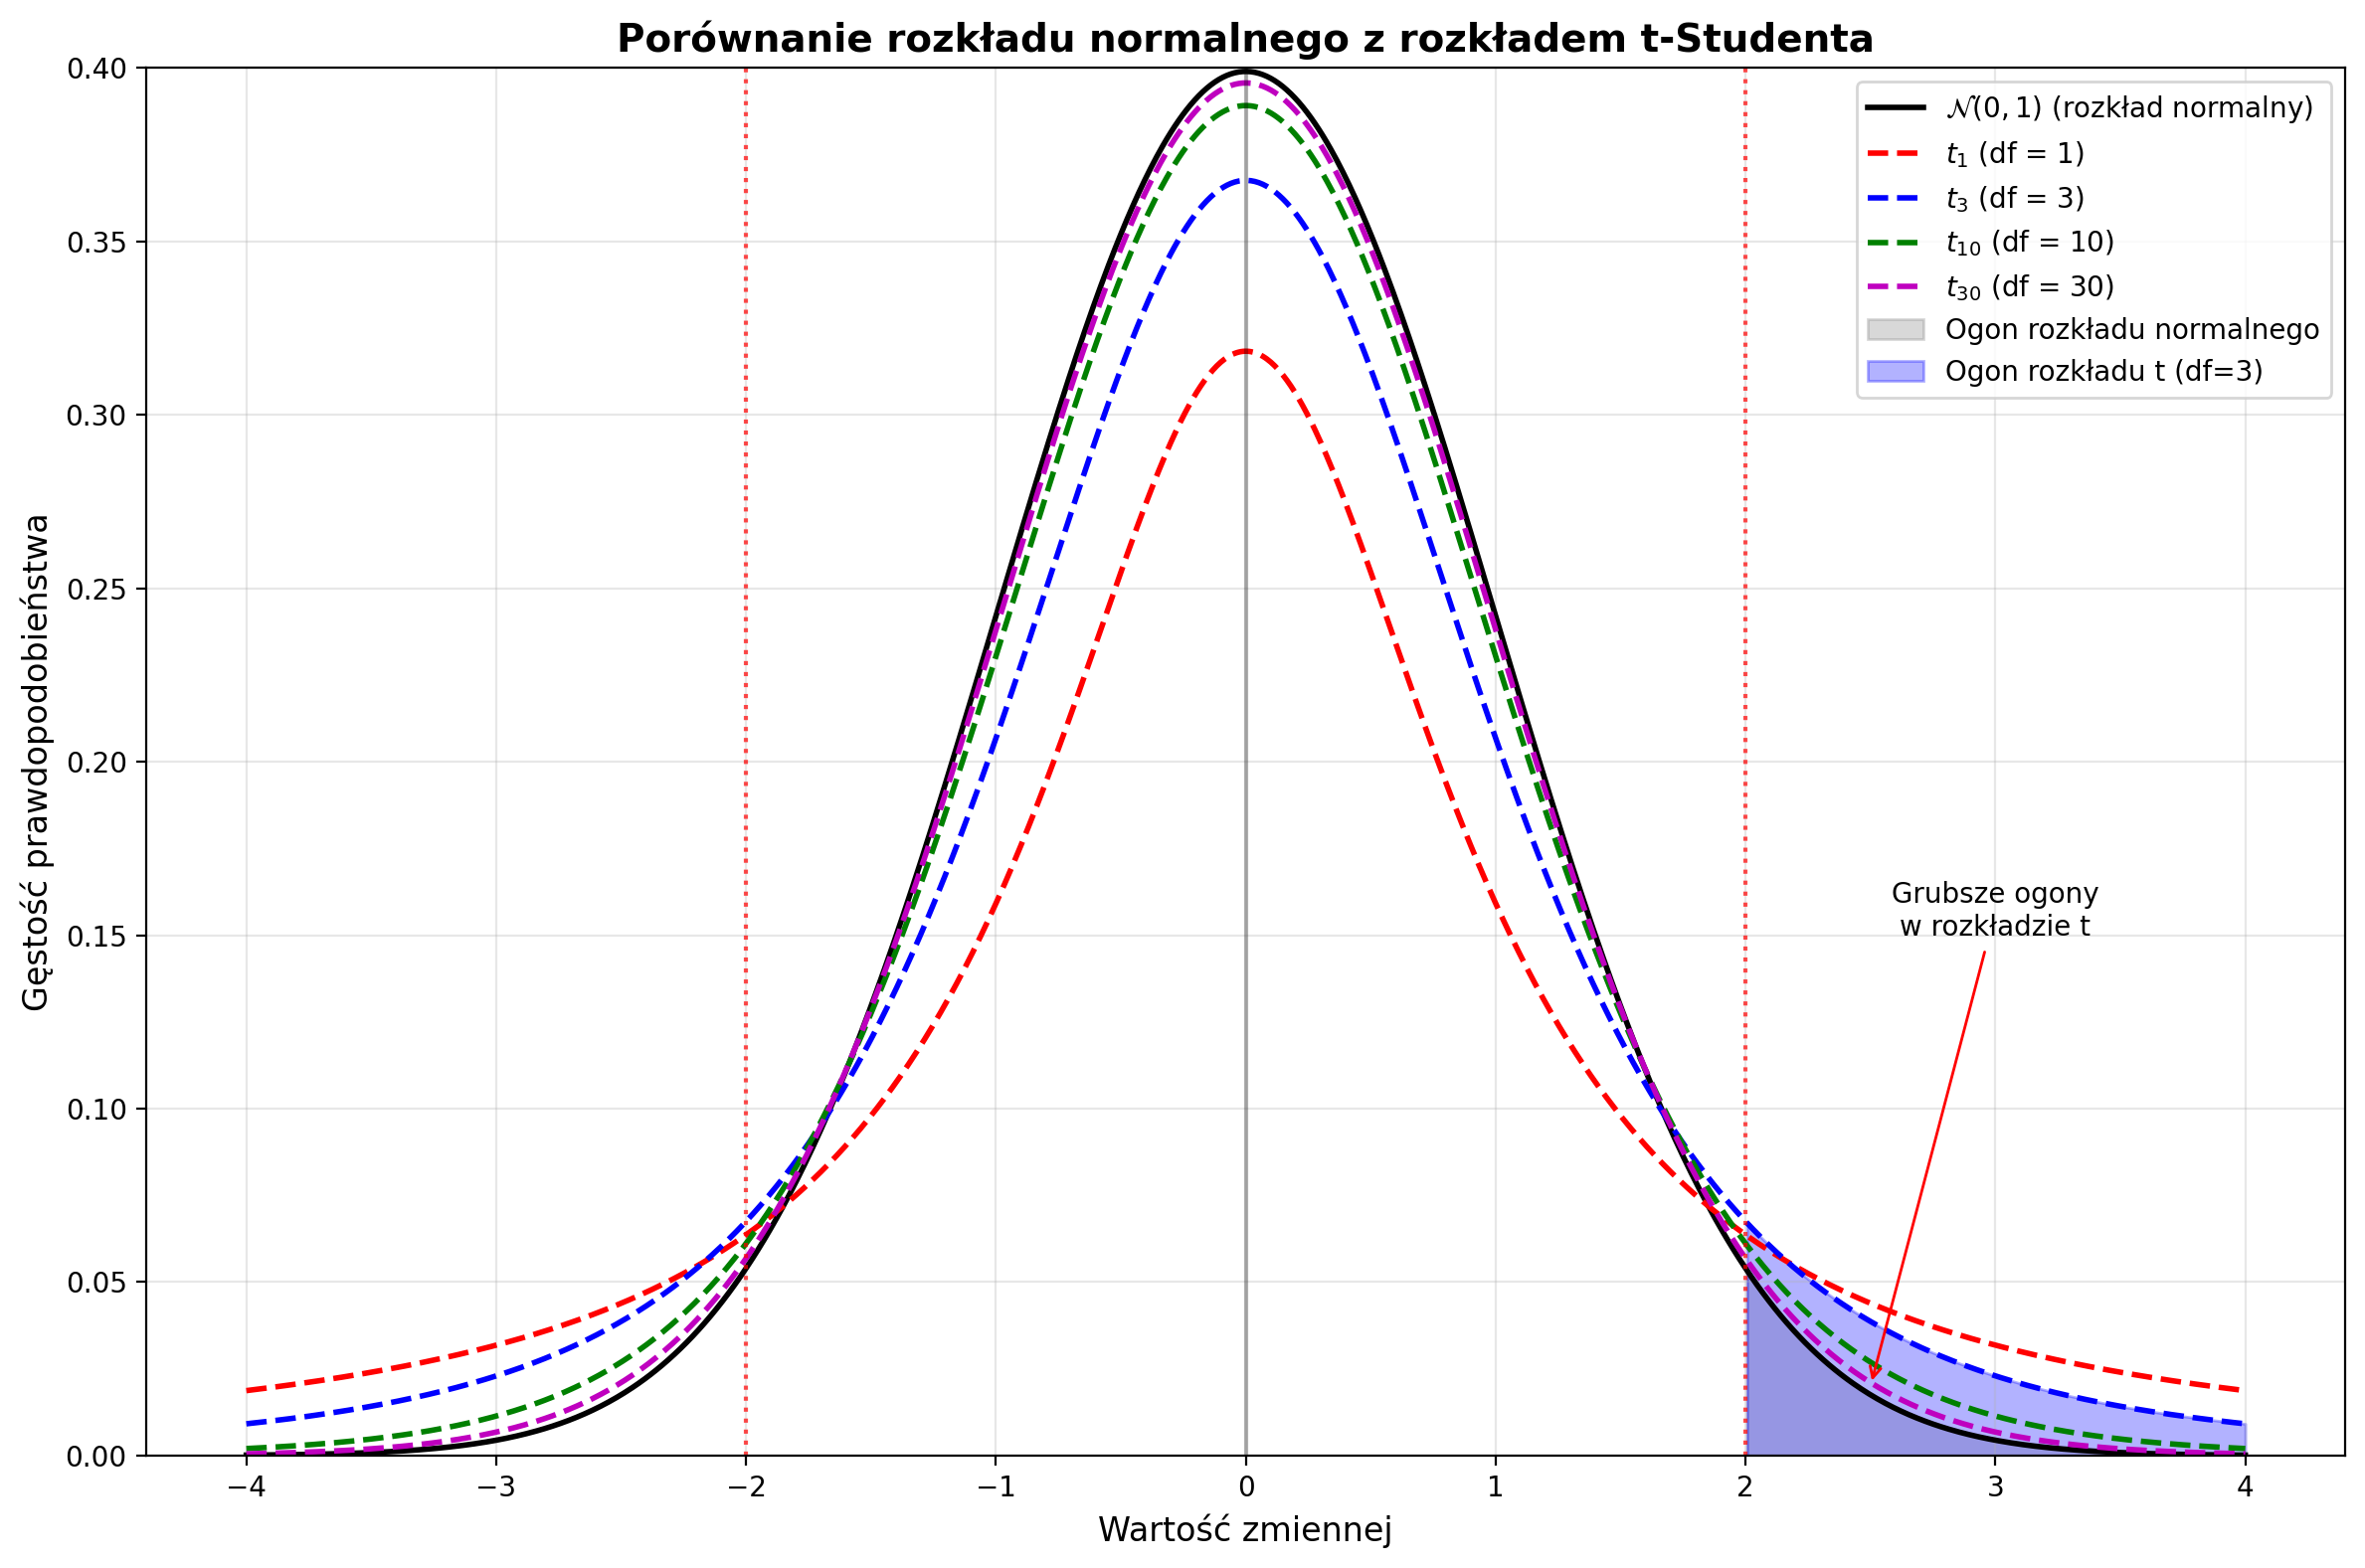

Porównanie wariancji:
Rozkład normalny N(0,1): σ² = 1.000
Rozkład t-Studenta (df=1): σ² = nieskończona
Rozkład t-Studenta (df=2): σ² = nieskończona
Rozkład t-Studenta (df=3): σ² = 3.000
Rozkład t-Studenta (df=5): σ² = 1.667
Rozkład t-Studenta (df=10): σ² = 1.250
Rozkład t-Studenta (df=30): σ² = 1.071


In [28]:
# Porównanie rozkładu normalnego z rozkładem t-Studenta
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Parametry
x = np.linspace(-4, 4, 1000)

# Rozkład normalny standardowy
y_normal = stats.norm.pdf(x, 0, 1)

# Rozkłady t-Studenta z różnymi stopniami swobody
y_t1 = stats.t.pdf(x, df=1)
y_t3 = stats.t.pdf(x, df=3)
y_t10 = stats.t.pdf(x, df=10)
y_t30 = stats.t.pdf(x, df=30)

# Tworzenie wykresu
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Rysowanie krzywych
ax.plot(x, y_normal, 'k-', linewidth=2, label='$\\mathcal{N}(0,1)$ (rozkład normalny)')
ax.plot(x, y_t1, 'r--', linewidth=2, label='$t_1$ (df = 1)')
ax.plot(x, y_t3, 'b--', linewidth=2, label='$t_3$ (df = 3)') 
ax.plot(x, y_t10, 'g--', linewidth=2, label='$t_{10}$ (df = 10)')
ax.plot(x, y_t30, 'm--', linewidth=2, label='$t_{30}$ (df = 30)')

# Zakreskowanie obszaru dla ilustracji grubszych ogonów
x_tail = x[x >= 2]
y_normal_tail = stats.norm.pdf(x_tail, 0, 1)
y_t3_tail = stats.t.pdf(x_tail, df=3)

ax.fill_between(x_tail, 0, y_normal_tail, alpha=0.3, color='gray', 
                label='Ogon rozkładu normalnego')
ax.fill_between(x_tail, 0, y_t3_tail, alpha=0.3, color='blue',
                label='Ogon rozkładu t (df=3)')

# Dodanie linii pionowych
ax.axvline(0, color='black', linestyle='-', alpha=0.3)
ax.axvline(2, color='red', linestyle=':', alpha=0.7)
ax.axvline(-2, color='red', linestyle=':', alpha=0.7)

# Annotacje
ax.annotate('Grubsze ogony\nw rozkładzie t', 
            xy=(2.5, 0.02), xytext=(3, 0.15),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=10, ha='center')

# Formatowanie wykresu
ax.set_xlabel('Wartość zmiennej', fontsize=12)
ax.set_ylabel('Gęstość prawdopodobieństwa', fontsize=12)
ax.set_title('Porównanie rozkładu normalnego z rozkładem t-Studenta', fontsize=14, fontweight='bold')
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)
ax.set_ylim(0, 0.4)

plt.tight_layout()
plt.show()

# Tabela porównawcza wariancji
print("Porównanie wariancji:")
print("Rozkład normalny N(0,1): σ² = 1.000")
for df in [1, 2, 3, 5, 10, 30]:
    if df > 2:
        var_t = df / (df - 2)
        print(f"Rozkład t-Studenta (df={df}): σ² = {var_t:.3f}")
    else:
        print(f"Rozkład t-Studenta (df={df}): σ² = nieskończona")

---

# Proporcja z próby

## Symulacja 2.

Załóżmy, że koszykarz wykonuje 10 rzutów (n=10) i trafia z prawdopodobieństwem 0,4 (prawdopodobieństwo sukcesu p=0,4).

Jeśli ten koszykarz wykona to ćwiczenie raz, możemy obliczyć liczbę sukcesów w następujący sposób

### Rozkład dwumianowy w Symulacji 2.

W **Symulacji 2.** analizujemy klasyczny przykład **rozkładu dwumianowego** (ang. binomial distribution), który modeluje liczbę sukcesów w sekwencji niezależnych prób Bernoulliego.

#### Definicja i wzór

**Rozkład dwumianowy** opisuje prawdopodobieństwo uzyskania dokładnie $k$ sukcesów w $n$ niezależnych próbach, gdzie każda próba ma prawdopodobieństwo sukcesu równe $p$.

**Funkcja masy prawdopodobieństwa:**

$$P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$$

gdzie:
- $X$ – zmienna losowa oznaczająca liczbę sukcesów
- $n = 10$ – liczba rzutów (prób)
- $k \in \{0, 1, 2, \ldots, n\}$ – konkretna liczba trafień
- $p = 0{,}4$ – prawdopodobieństwo trafienia w pojedynczym rzucie
- $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ – współczynnik dwumianowy

#### Parametry rozkładu

Dla rozkładu dwumianowego $X \sim \text{Binomial}(n, p)$:

- **Wartość oczekiwana:** $E[X] = np = 10 \times 0{,}4 = 4$
- **Wariancja:** $\text{Var}(X) = np(1-p) = 10 \times 0{,}4 \times 0{,}6 = 2{,}4$
- **Odchylenie standardowe:** $\sigma = \sqrt{np(1-p)} = \sqrt{2{,}4} \approx 1{,}55$



In [33]:
# Generuje losowe dwumianowe próbki
scoring_success_1 = np.random.binomial(n=10, p=0.4, size=1)
prob_1 = scoring_success_1 / 10

In [34]:
# Dziennie
scoring_success_10 = np.random.binomial(n=10, p=0.4, size=10)
prob_10 = scoring_success_10 / 10

In [32]:
# Tygodniowo
scoring_success_50 = np.random.binomial(n=10, p=0.4, size=50)
prob_50 = scoring_success_50 / 10

In [31]:
# Miesięcznie
scoring_success_200 = np.random.binomial(n=10, p=0.4, size=200)
prob_200 = scoring_success_200 / 10

In [30]:
# Rocznie
scoring_success_2600 = np.random.binomial(n=10, p=0.4, size=2600)
prob_2600 = scoring_success_2600 / 10

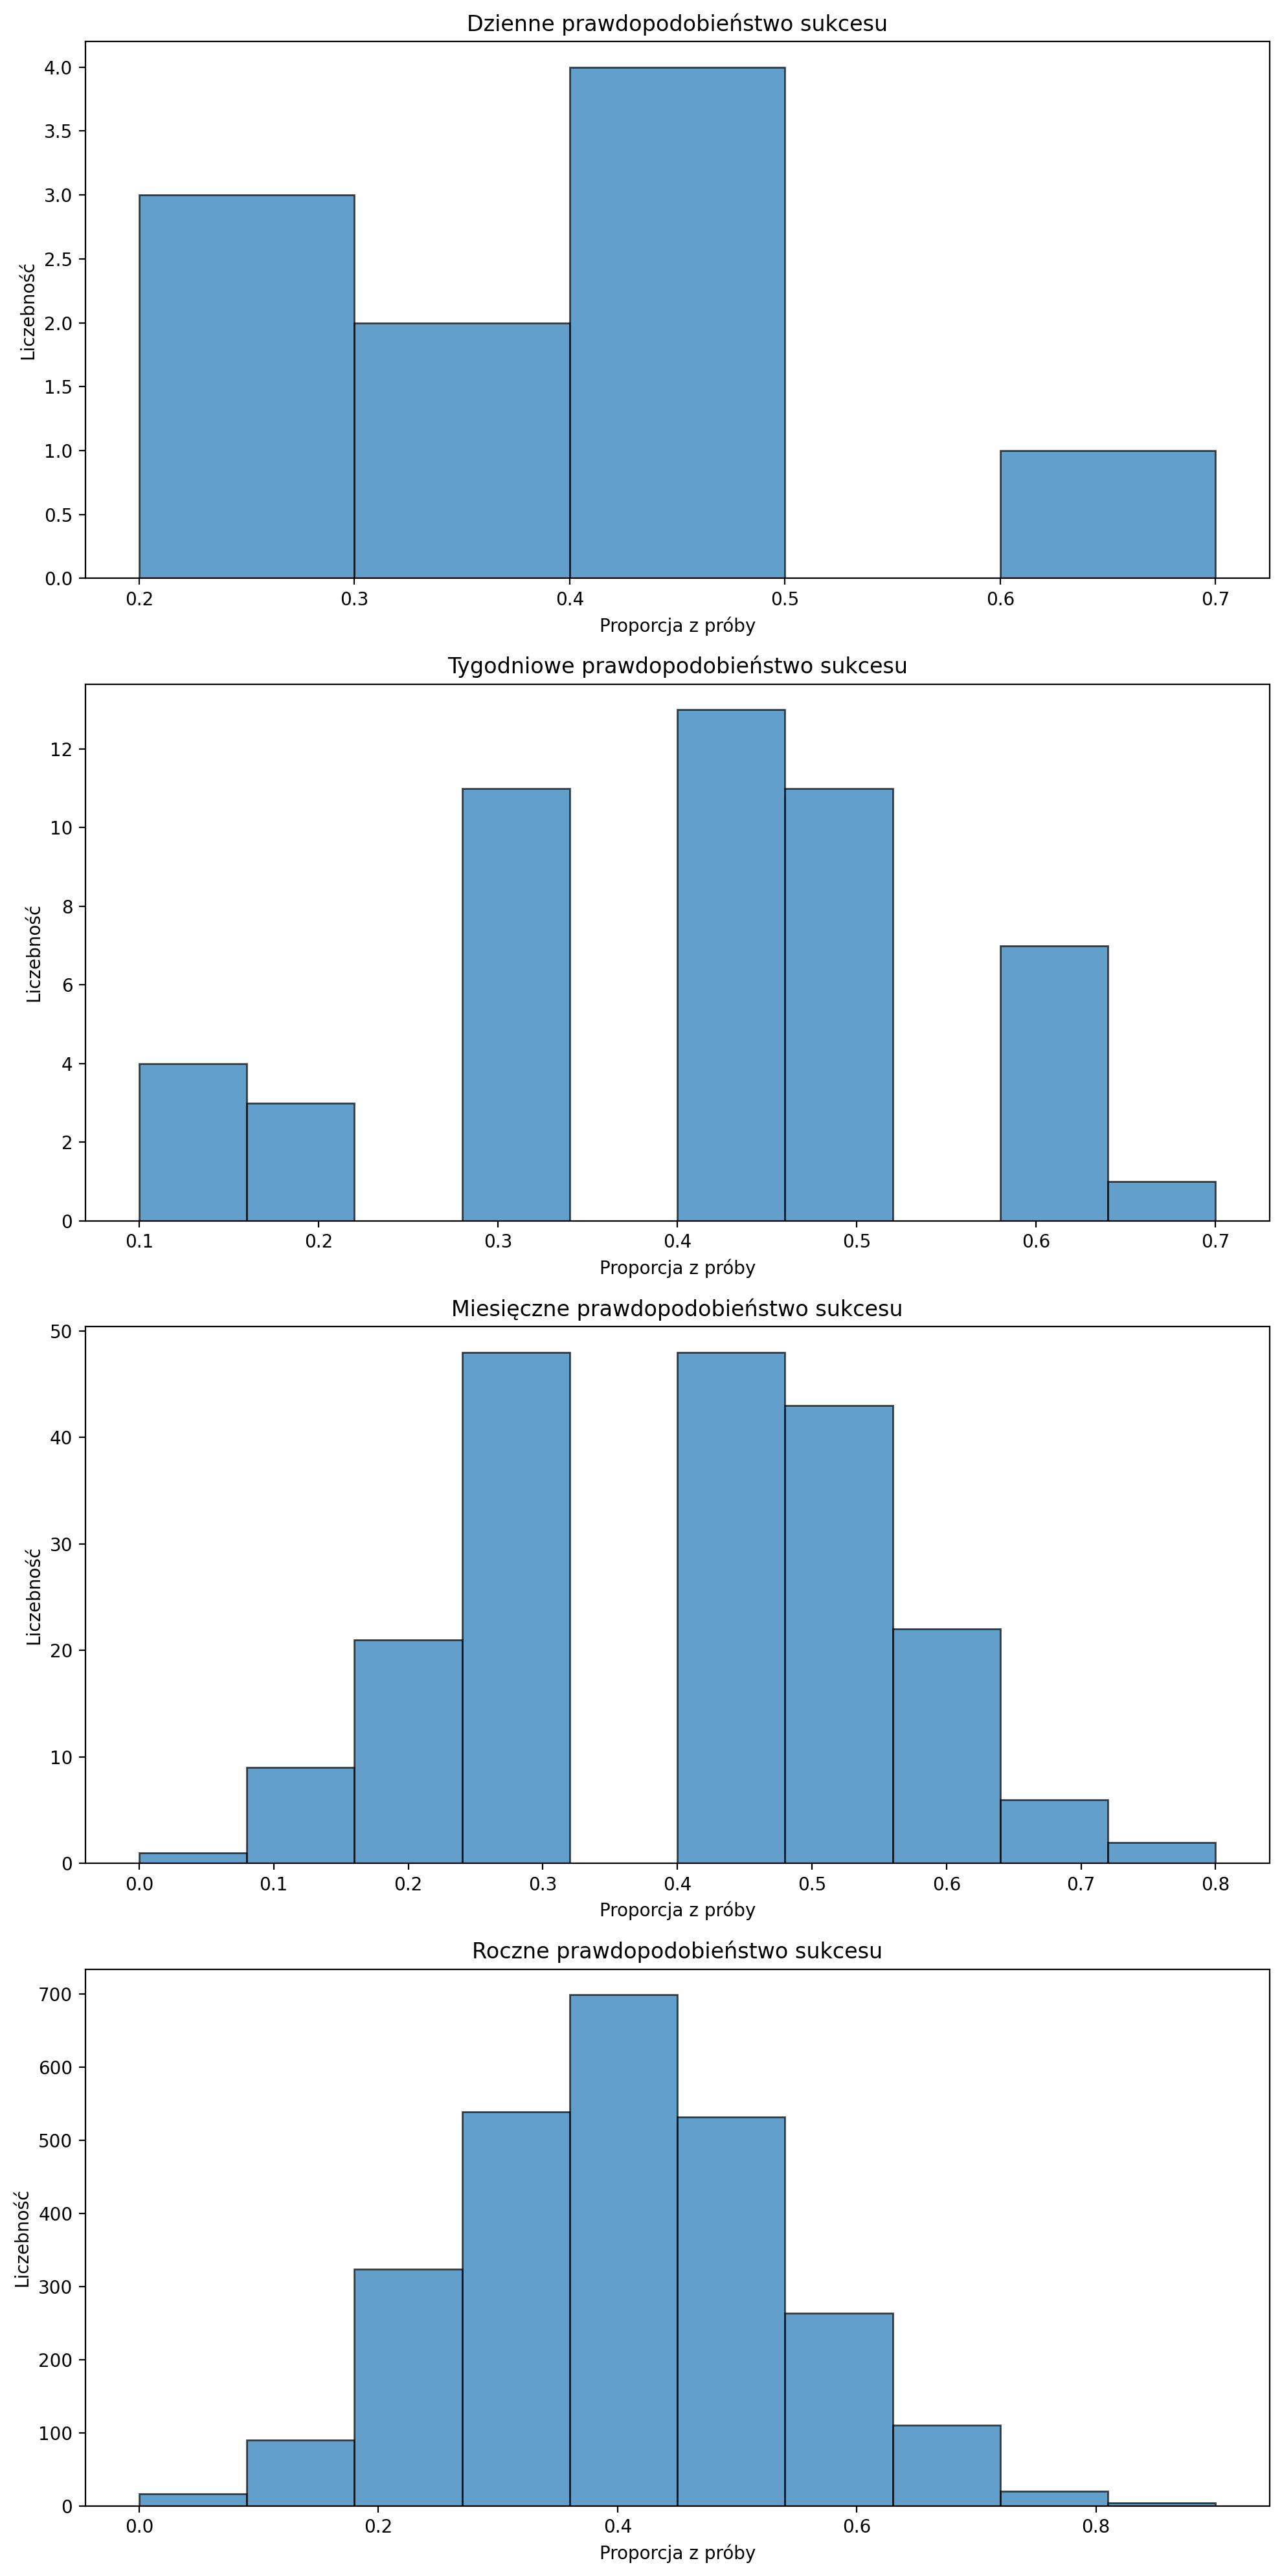

In [35]:
# Rysujemy histogramy
fig, axs = plt.subplots(4, 1, figsize=(10, 20))

axs[0].hist(prob_10, bins=5, edgecolor='k', alpha=0.7)
axs[0].set_title('Dzienne prawdopodobieństwo sukcesu')
axs[0].set_xlabel('Proporcja z próby')
axs[0].set_ylabel('Liczebność')

axs[1].hist(prob_50, bins=10, edgecolor='k', alpha=0.7)
axs[1].set_title('Tygodniowe prawdopodobieństwo sukcesu')
axs[1].set_xlabel('Proporcja z próby')
axs[1].set_ylabel('Liczebność')

axs[2].hist(prob_200, bins=10, edgecolor='k', alpha=0.7)
axs[2].set_title('Miesięczne prawdopodobieństwo sukcesu')
axs[2].set_xlabel('Proporcja z próby')
axs[2].set_ylabel('Liczebność')

axs[3].hist(prob_2600, bins=10, edgecolor='k', alpha=0.7)
axs[3].set_title('Roczne prawdopodobieństwo sukcesu')
axs[3].set_xlabel('Proporcja z próby')
axs[3].set_ylabel('Liczebność')

plt.tight_layout()
plt.show()

#### Proporcja z próby

W symulacji obliczamy **proporcję sukcesów**:

$$\hat{p} = \frac{X}{n}$$

gdzie $\hat{p}$ jest estymatorem prawdziwego prawdopodobieństwa $p = 0{,}4$.

#### Centralne Twierdzenie Graniczne dla proporcji

Gdy liczba niezależnych eksperymentów rośnie, rozkład proporcji $\hat{p}$ zbliża się do **rozkładu normalnego**:

$$\hat{p} \xrightarrow{d} \mathcal{N}\left(p, \frac{p(1-p)}{n}\right)$$

czyli:

$$\hat{p} \sim \mathcal{N}\left(0{,}4, \frac{0{,}4 \times 0{,}6}{10}\right) = \mathcal{N}(0{,}4, 0{,}024)$$

**Błąd standardowy proporcji:**

$$SE(\hat{p}) = \sqrt{\frac{p(1-p)}{n}} = \sqrt{\frac{0{,}4 \times 0{,}6}{10}} = \sqrt{0{,}024} \approx 0{,}155$$

To właśnie obserwujemy na histogramach – wraz ze wzrostem liczby symulacji rozkład proporcji staje się coraz bardziej normalny i skupiony wokół prawdziwej wartości $p = 0{,}4$.

#### Reguła 5

Przybliżenie normalne jest dokładne, gdy spełnione są warunki:

$$np \geq 5 \quad \text{i} \quad n(1-p) \geq 5$$

W naszym przypadku:
- $np = 10 \times 0{,}4 = 4 < 5$ (nie spełnione)
- $n(1-p) = 10 \times 0{,}6 = 6 \geq 5$ (spełnione)

To właśnie obserwujemy na histogramach – wraz ze wzrostem liczby symulacji rozkład proporcji staje się coraz bardziej normalny i skupiony wokół prawdziwej wartości $p = 0{,}4$.

---

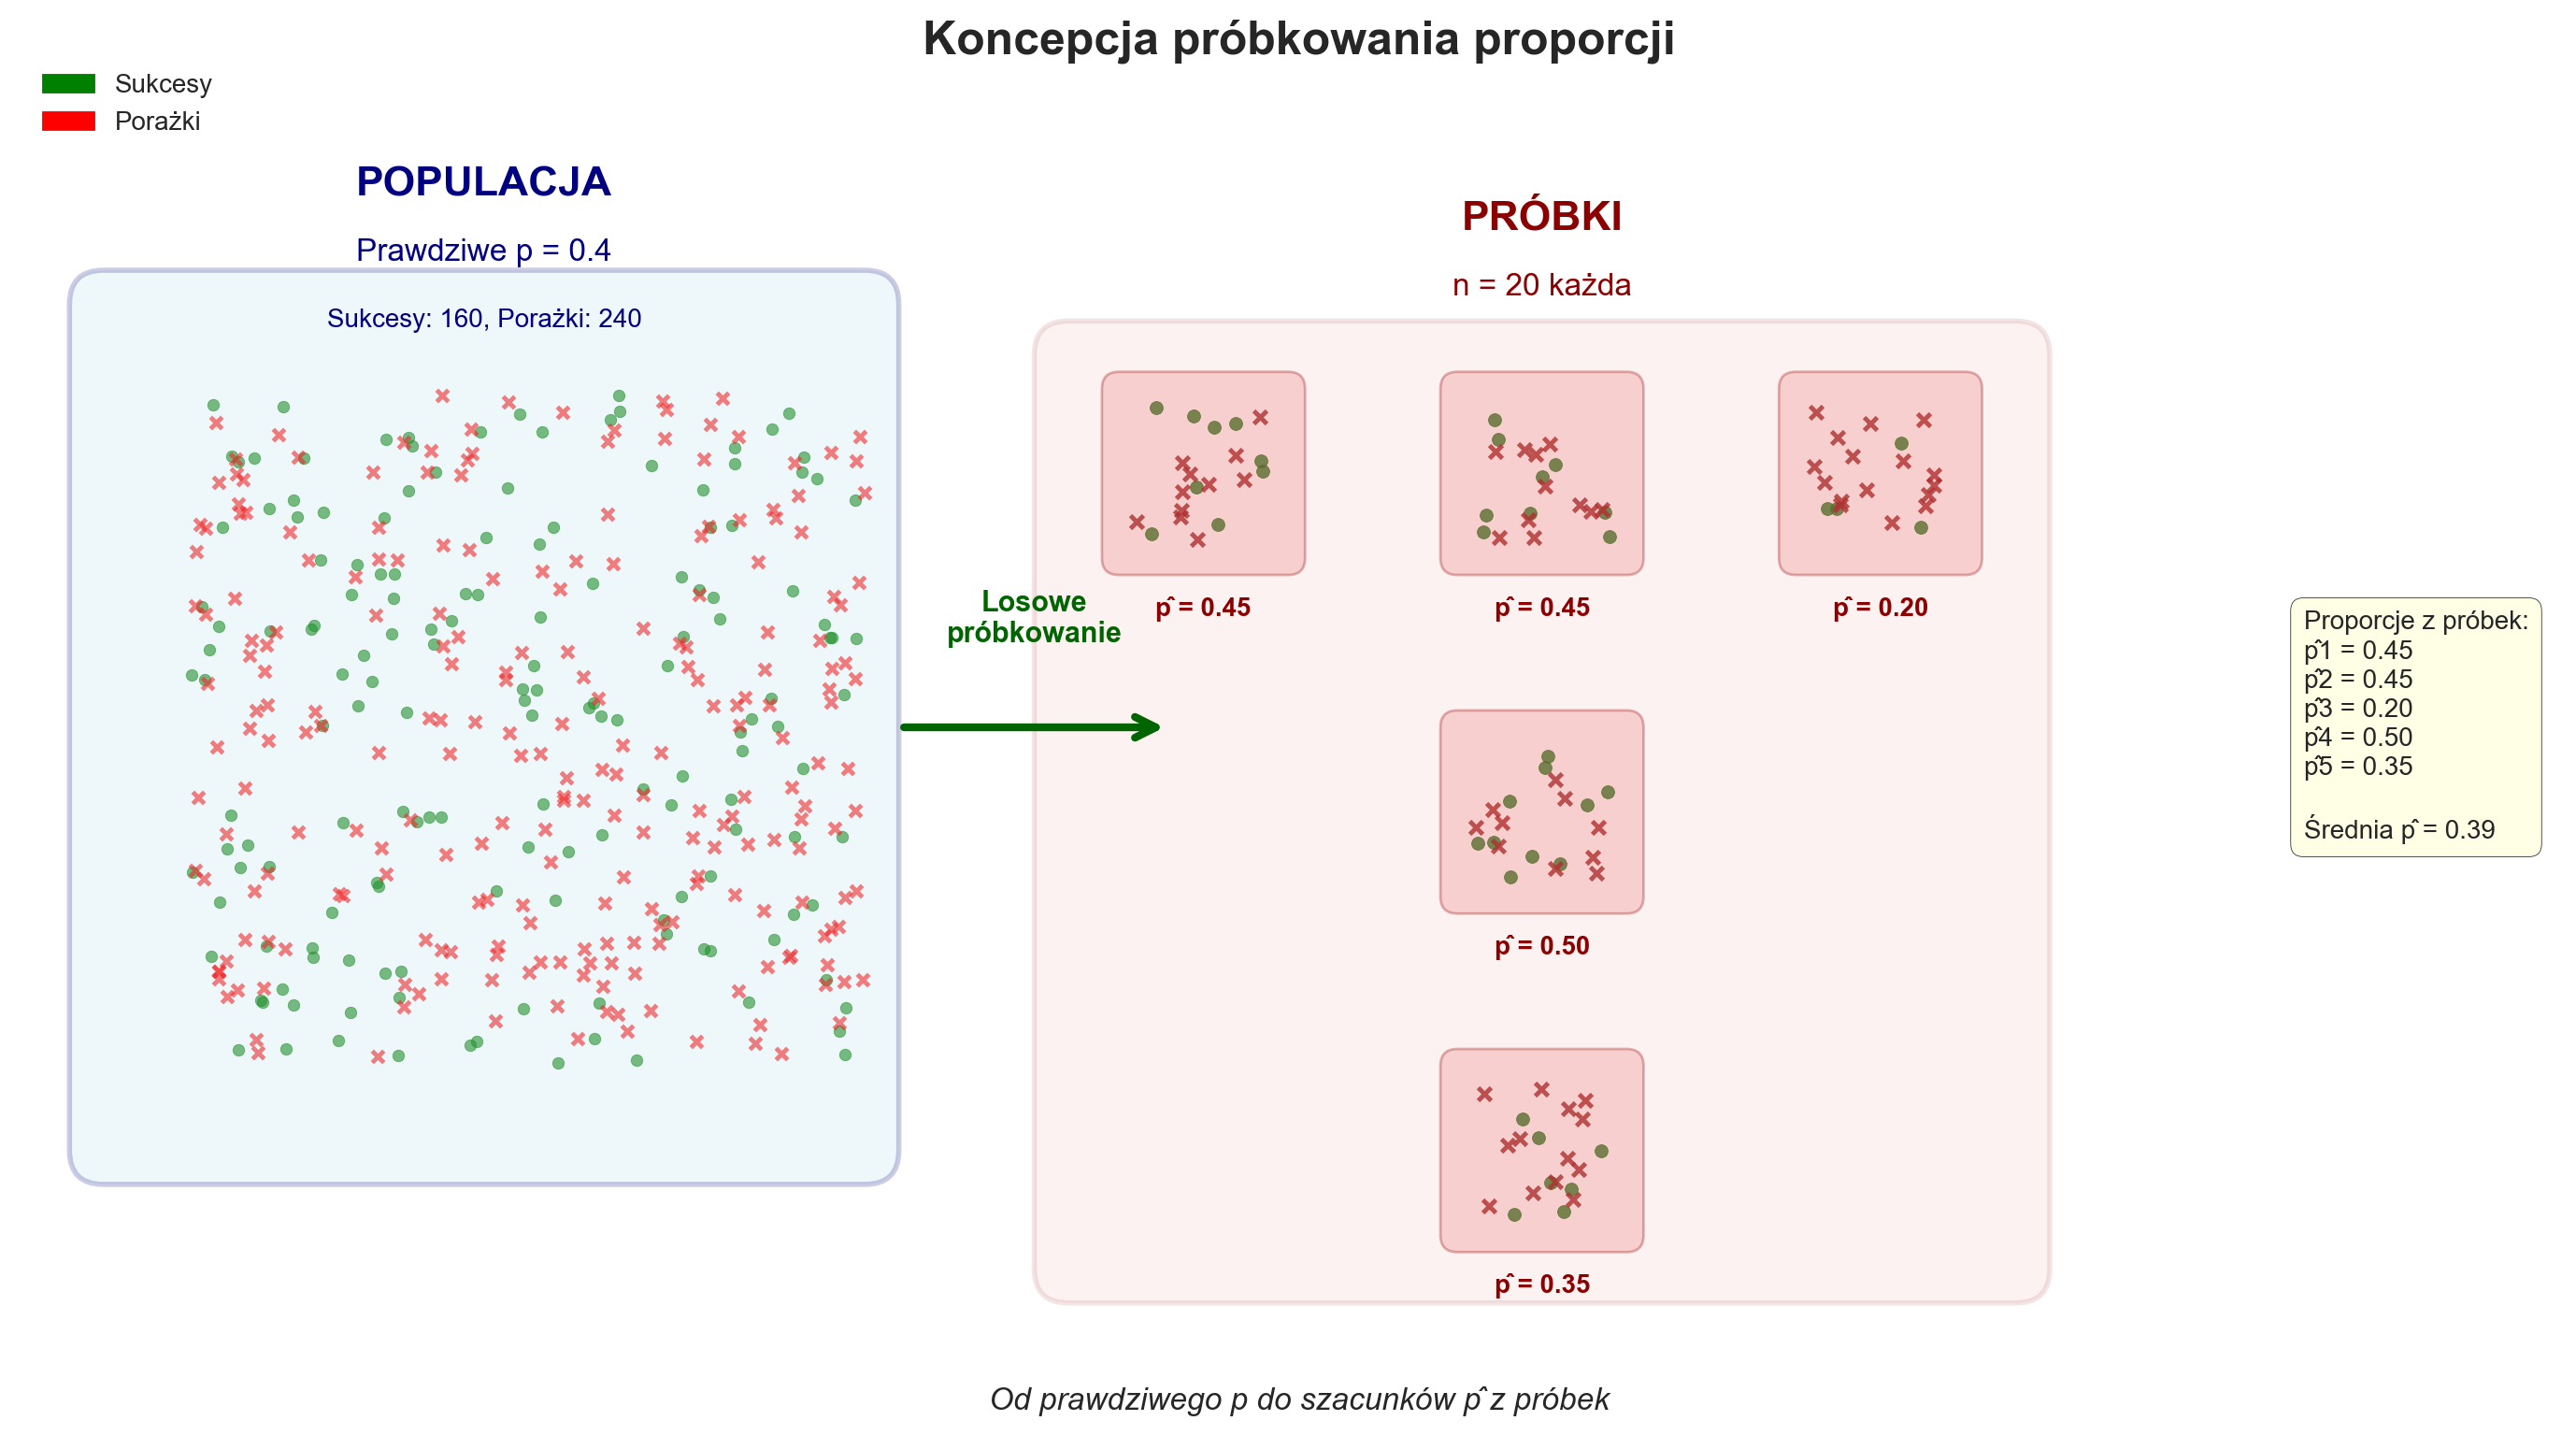

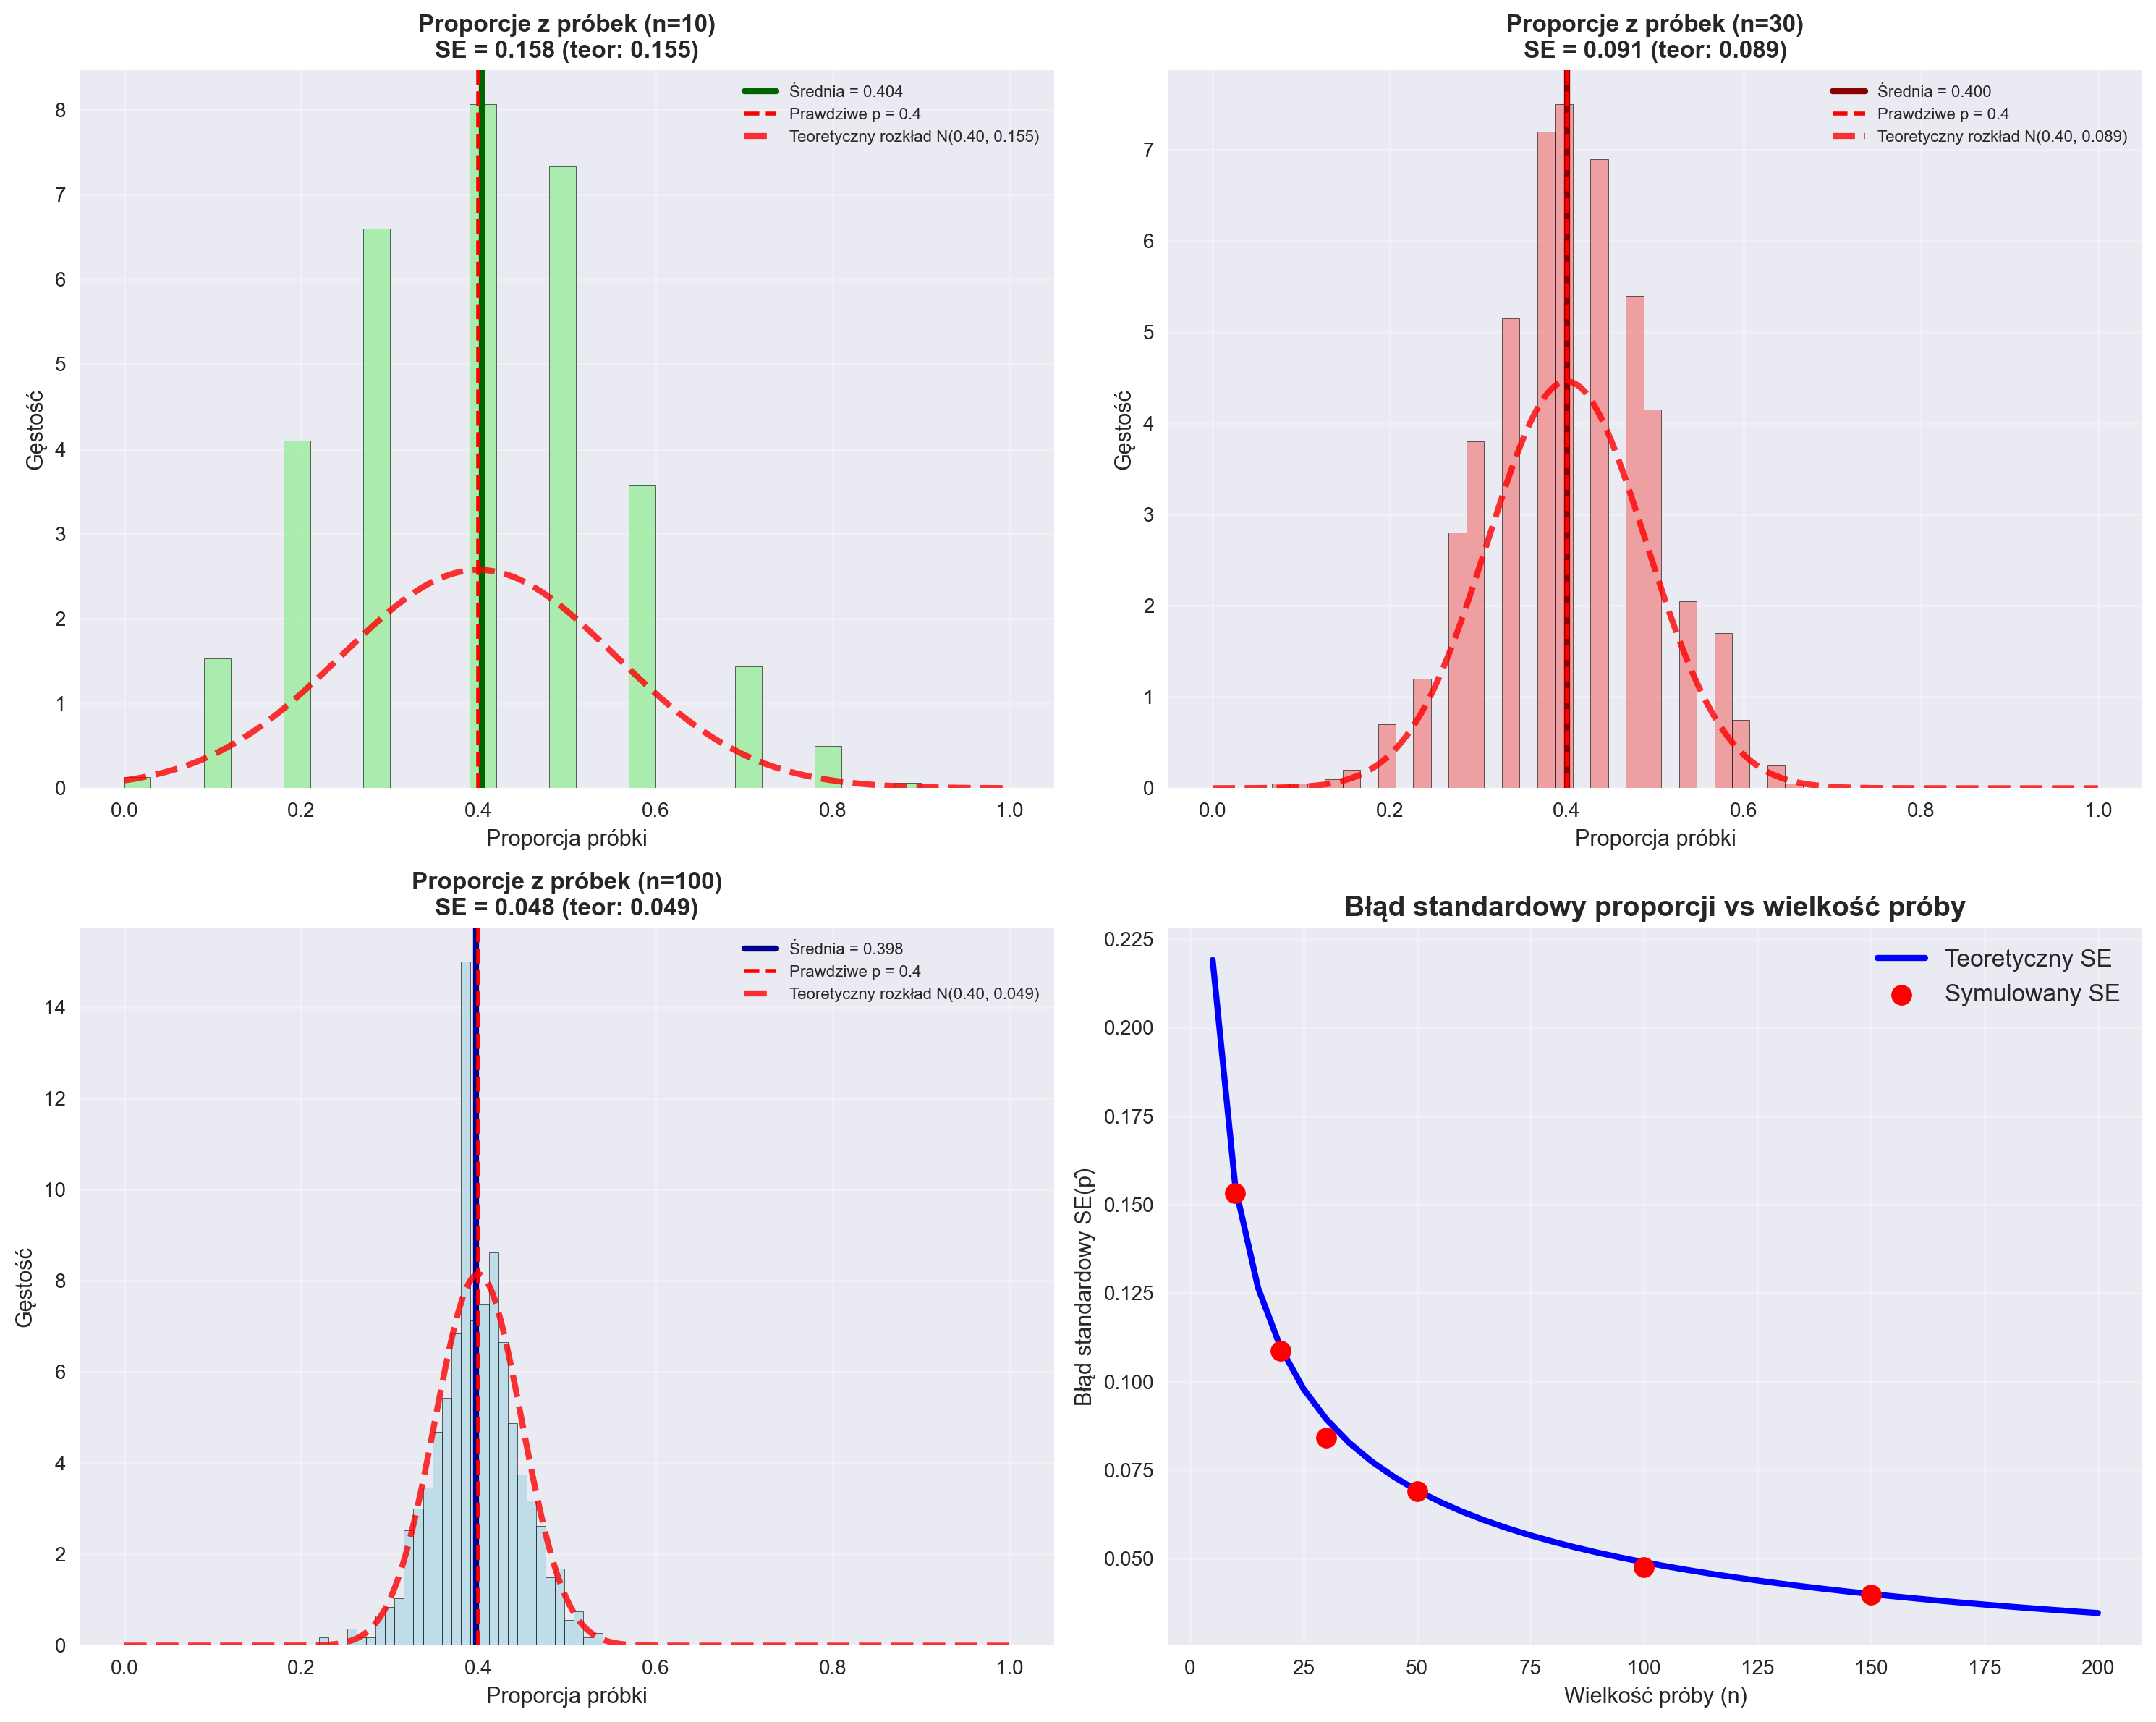

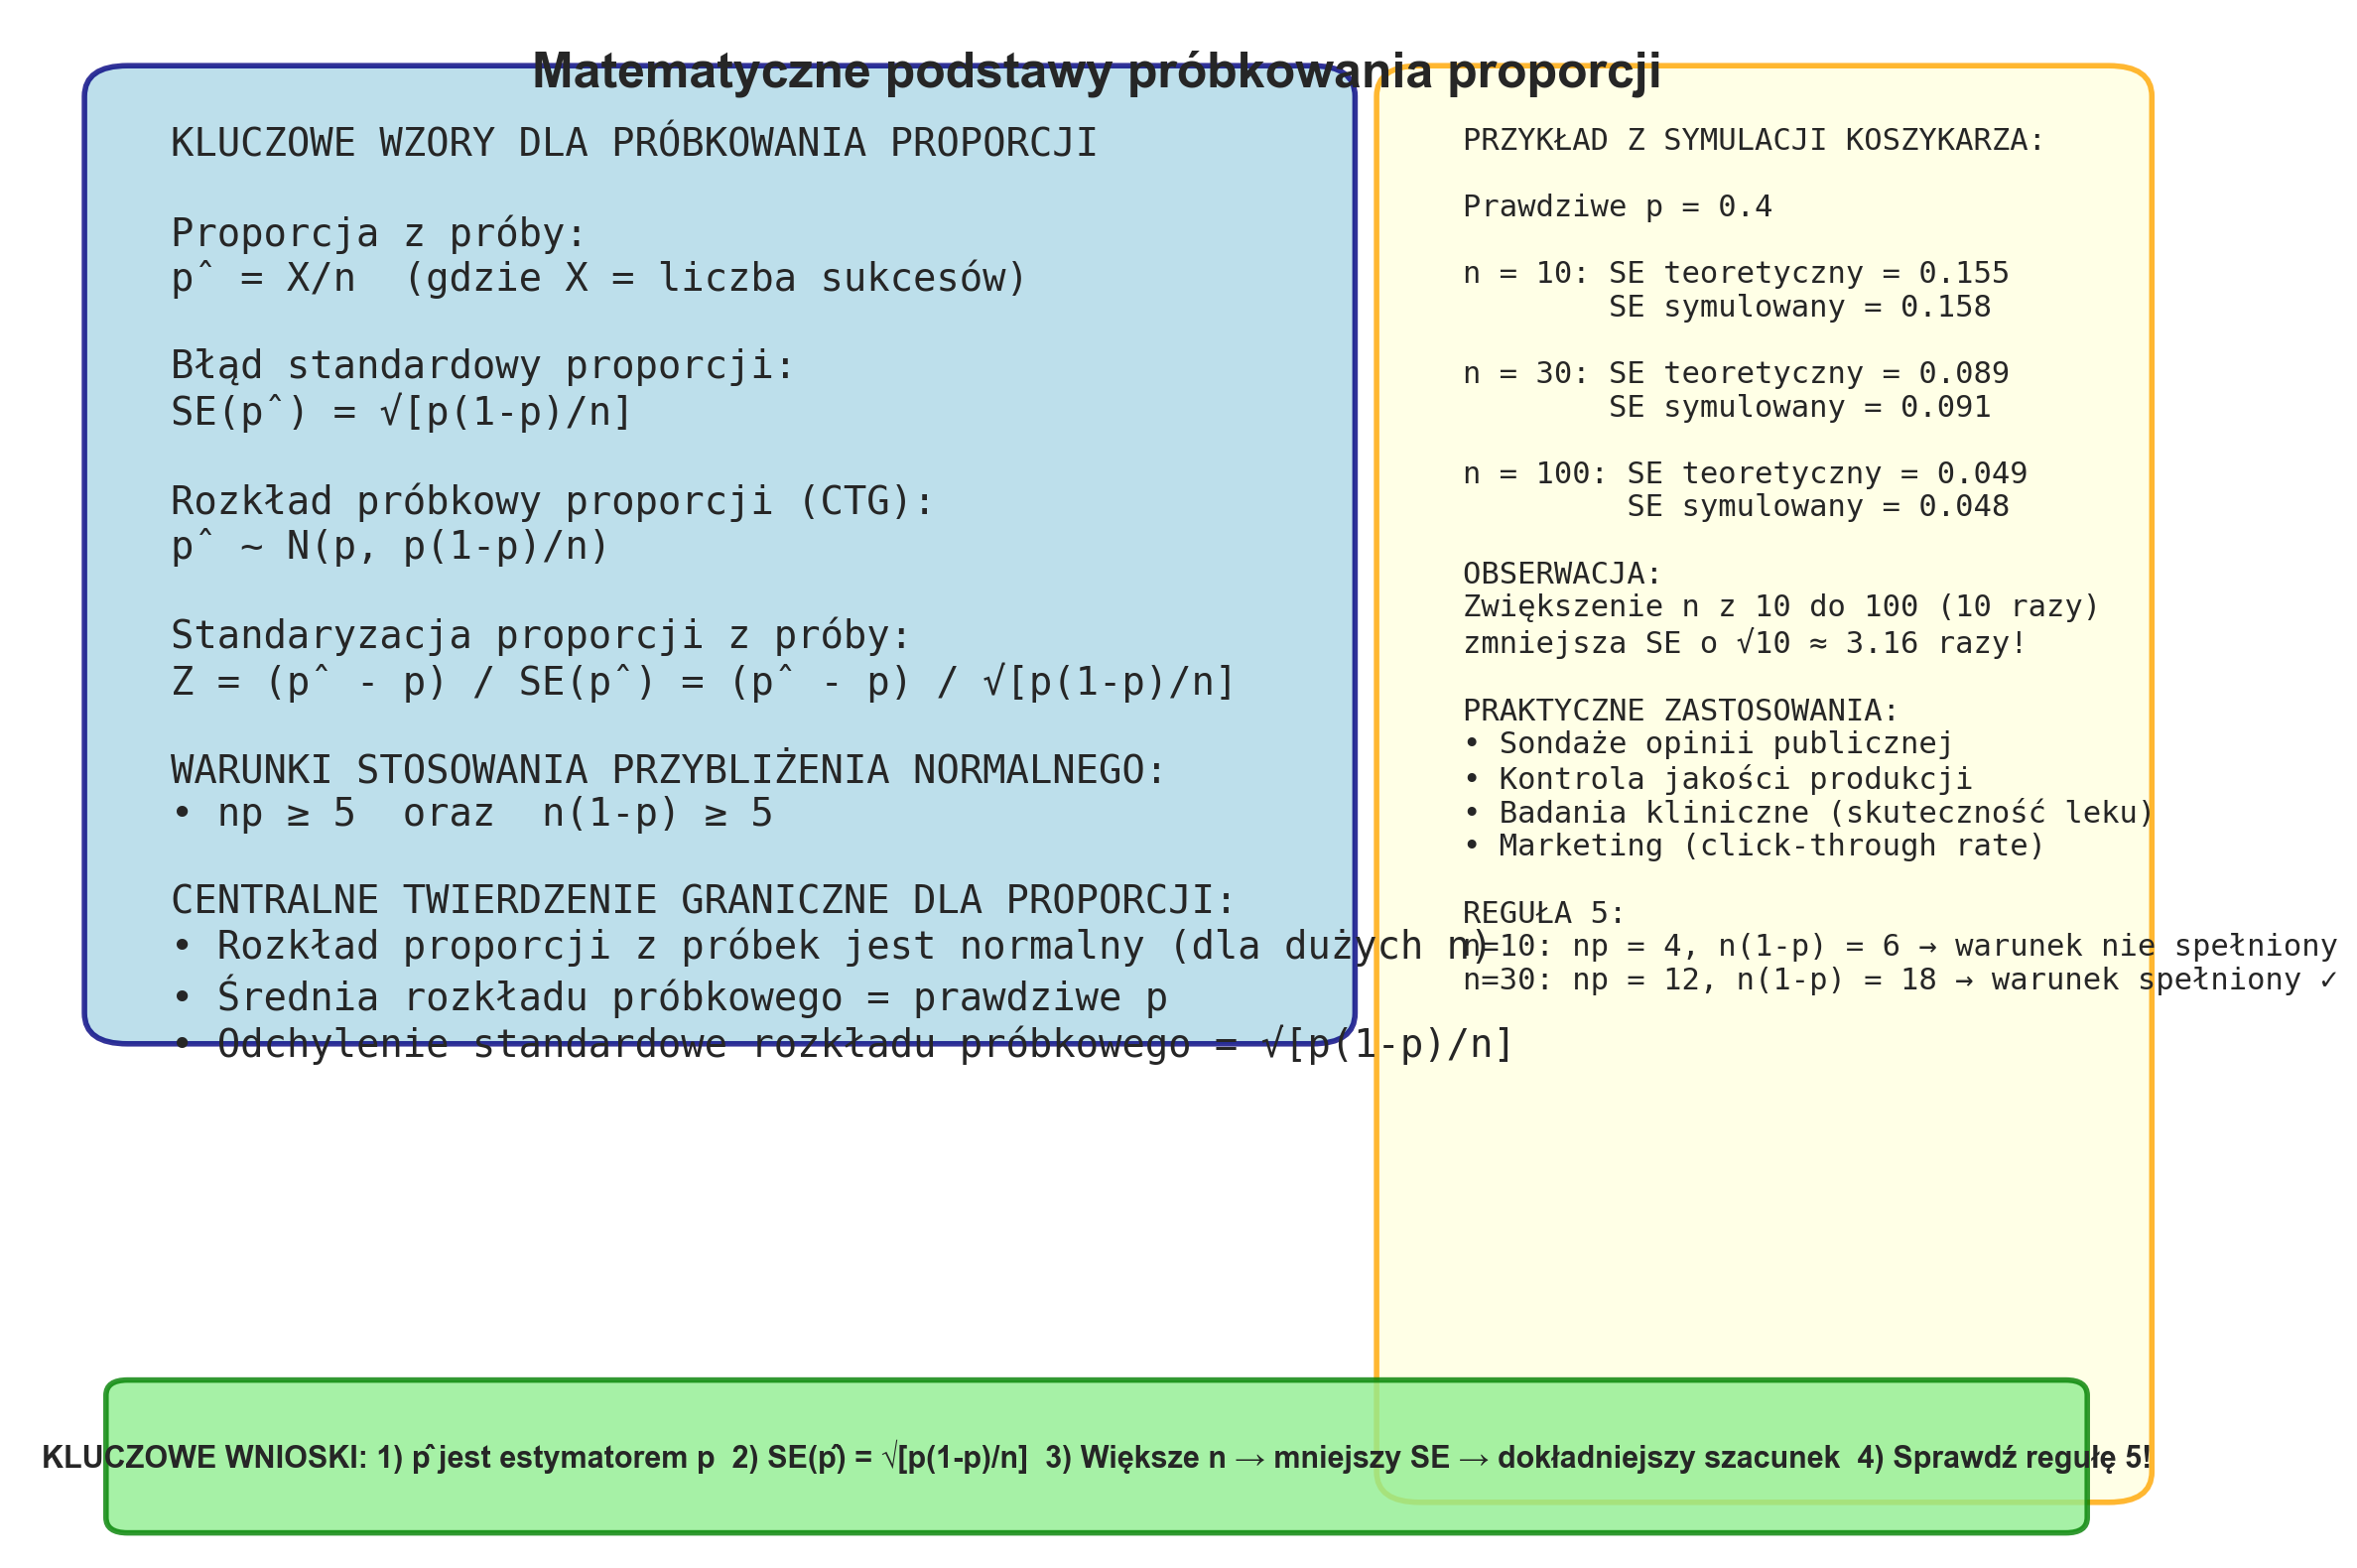

PODSUMOWANIE SYMULACJI PRÓBKOWANIA PROPORCJI
Prawdziwe p = 0.4
Liczba symulacji: 1000 dla każdej wielkości próby

WYNIKI:
n=10:  Średnia p̂ = 0.404, SE = 0.158
n=30:  Średnia p̂ = 0.400, SE = 0.091
n=100: Średnia p̂ = 0.398, SE = 0.048

WERYFIKACJA WZORU SE(p̂) = √[p(1-p)/n]:
n=10:  SE teoretyczny = 0.155, SE empiryczny = 0.158
n=30:  SE teoretyczny = 0.089, SE empiryczny = 0.091
n=100: SE teoretyczny = 0.049, SE empiryczny = 0.048

SPRAWDZENIE REGUŁY 5:
n=10: np = 4.0, n(1-p) = 6.0 → Reguła 5: ✗
n=30: np = 12.0, n(1-p) = 18.0 → Reguła 5: ✓
n=100: np = 40.0, n(1-p) = 60.0 → Reguła 5: ✓


In [11]:
## Koncepcja samplingu - proporcje

exec(open('sampling_proporcje.py').read())